In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import sklearn
import math
import sys

# Print versions
print("Versions of installed libraries:")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib.pyplot: {plt.matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"geopy: {geopy.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"math: {sys.version}")  # Displays Python version

Versions of installed libraries:
numpy: 1.26.4
pandas: 2.2.2
matplotlib.pyplot: 3.8.4
seaborn: 0.13.2
geopy: 2.4.1
scikit-learn: 1.4.2
math: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [3]:
dfc = pd.read_csv('calendar.csv')
dfl = pd.read_csv('listings.csv')
dfr = pd.read_csv('reviews.csv')

In [5]:
dfc.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [7]:
# ubah format data
dfc['date'] = pd.to_datetime(dfc['date'], format='%Y-%m-%d')
# Tambahkan kolom bulan dan tahun
dfc['bulan'] = dfc['date'].dt.month
dfc['tahun'] = dfc['date'].dt.year

In [8]:
dfc.head()

listing_id       date available   price  bulan  tahun
0      241032 2016-01-04         t  $85.00      1   2016
1      241032 2016-01-05         t  $85.00      1   2016
2      241032 2016-01-06         f     NaN      1   2016
3      241032 2016-01-07         f     NaN      1   2016
4      241032 2016-01-08         f     NaN      1   2016

In [11]:
dfc['bulan'] = dfc['date'].dt.strftime('%B')  # '%B' menghasilkan nama bulan dalam teks

In [13]:
dfc.head()

listing_id       date available   price    bulan  tahun
0      241032 2016-01-04         t  $85.00  January   2016
1      241032 2016-01-05         t  $85.00  January   2016
2      241032 2016-01-06         f     NaN  January   2016
3      241032 2016-01-07         f     NaN  January   2016
4      241032 2016-01-08         f     NaN  January   2016

In [15]:
dfc['price'] = dfc['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [17]:
dfc = dfc.rename({'price': 'pendapatan'}, axis=1)

In [19]:
dfc.head()

listing_id       date available  pendapatan    bulan  tahun
0      241032 2016-01-04         t        85.0  January   2016
1      241032 2016-01-05         t        85.0  January   2016
2      241032 2016-01-06         f         NaN  January   2016
3      241032 2016-01-07         f         NaN  January   2016
4      241032 2016-01-08         f         NaN  January   2016

In [21]:
# buang null
dfc_cleaned = dfc.dropna()

In [23]:
# Membuat dictionary untuk memetakan nama bulan ke angka
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [25]:
# Menambahkan kolom bulan numerik
dfc_cleaned['bulan_num'] = dfc_cleaned['bulan'].map(month_mapping)

C:\Users\Swift3\AppData\Local\Temp\ipykernel_18120\1767414773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_cleaned['bulan_num'] = dfc_cleaned['bulan'].map(month_mapping)


In [27]:
dfc_cleaned.head()

listing_id       date available  pendapatan    bulan  tahun  bulan_num
0       241032 2016-01-04         t        85.0  January   2016          1
1       241032 2016-01-05         t        85.0  January   2016          1
9       241032 2016-01-13         t        85.0  January   2016          1
10      241032 2016-01-14         t        85.0  January   2016          1
14      241032 2016-01-18         t        85.0  January   2016          1

In [29]:
# di sort perbulan
dfc_cleaned = dfc_cleaned.sort_values(by=['listing_id','tahun','bulan_num'])
dfc_cleaned.head()

listing_id       date available  pendapatan     bulan  tahun  \
797216        3335 2016-02-29         t       120.0  February   2016   
797217        3335 2016-03-01         t       120.0     March   2016   
797218        3335 2016-03-02         t       120.0     March   2016   
797219        3335 2016-03-03         t       120.0     March   2016   
797220        3335 2016-03-04         t       120.0     March   2016   

        bulan_num  
797216          2  
797217          3  
797218          3  
797219          3  
797220          3

In [31]:
dfc_r = dfc_cleaned[['listing_id','date','bulan_num','tahun','pendapatan']]
dfc_r.head()

listing_id       date  bulan_num  tahun  pendapatan
797216        3335 2016-02-29          2   2016       120.0
797217        3335 2016-03-01          3   2016       120.0
797218        3335 2016-03-02          3   2016       120.0
797219        3335 2016-03-03          3   2016       120.0
797220        3335 2016-03-04          3   2016       120.0

In [33]:
df1 = dfc_r
df1.head()

listing_id       date  bulan_num  tahun  pendapatan
797216        3335 2016-02-29          2   2016       120.0
797217        3335 2016-03-01          3   2016       120.0
797218        3335 2016-03-02          3   2016       120.0
797219        3335 2016-03-03          3   2016       120.0
797220        3335 2016-03-04          3   2016       120.0

In [35]:
# Hitung median price per bulan untuk tiap id, dan jumlah id di setiap bulan-tahun
df1g = df1.groupby(['listing_id', 'tahun', 'bulan_num']).agg(
    pendapatan_per_bulan=('pendapatan', 'sum'),
    median_price=('pendapatan', 'median'),
    jumlah_customer=('listing_id', 'size')
).reset_index()

In [37]:
df1g

listing_id  tahun  bulan_num  pendapatan_per_bulan  median_price  \
0            3335   2016          2                 120.0         120.0   
1            3335   2016          3                3720.0         120.0   
2            3335   2016          4                3600.0         120.0   
3            3335   2016          5                3720.0         120.0   
4            3335   2016          6                3600.0         120.0   
...           ...    ...        ...                   ...           ...   
36110    10340165   2016          9                1290.0          43.0   
36111    10340165   2016         10                1333.0          43.0   
36112    10340165   2016         11                1290.0          43.0   
36113    10340165   2016         12                1333.0          43.0   
36114    10340165   2017          1                  86.0          43.0   

       jumlah_customer  
0                    1  
1                   31  
2                   30  
3                   31  
4                   30  
...                ...  
36110               30  
36111               31  
36112               30  
36113               31  
36114                2  

[36115 rows x 6 columns]

In [39]:
df1.head()

listing_id       date  bulan_num  tahun  pendapatan
797216        3335 2016-02-29          2   2016       120.0
797217        3335 2016-03-01          3   2016       120.0
797218        3335 2016-03-02          3   2016       120.0
797219        3335 2016-03-03          3   2016       120.0
797220        3335 2016-03-04          3   2016       120.0

In [41]:
#rename id jadi listing_id
dfl = dfl.rename({'id': 'listing_id'}, axis=1)

#ambil kolom yang diperlukan
dfl2 = dfl[['listing_id','name','host_id','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified','zipcode','latitude','longitude','is_location_exact','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','guests_included','minimum_nights','maximum_nights','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification']]

In [43]:
# Mengubah data yang bertipe string ke float
dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['monthly_price'] = dfl2['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['host_response_rate'] = dfl2['host_response_rate'].str.replace('%', '').astype(float)
dfl2['host_acceptance_rate'] = dfl2['host_acceptance_rate'].str.replace('%', '').astype(float)

# Mengubah data yang beripe integer ke string
dfl2['host_id'] = dfl2['host_id'].astype(str)
dfl2['latitude'] = dfl2['latitude'].astype(str)
dfl2['longitude'] = dfl2['longitude'].astype(str)

C:\Users\Swift3\AppData\Local\Temp\ipykernel_18120\2586953589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Swift3\AppData\Local\Temp\ipykernel_18120\2586953589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Swift3\AppData\Local\Temp\ipykernel_18120\2586953589.py:4: SettingWithCopyWarning: 
A val

In [45]:
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   object 
 3   host_response_time                3295 non-null   object 
 4   host_response_rate                3295 non-null   float64
 5   host_acceptance_rate              3045 non-null   float64
 6   host_is_superhost                 3816 non-null   object 
 7   host_identity_verified            3816 non-null   object 
 8   zipcode                           3811 non-null   object 
 9   latitude                          3818 non-null   object 
 10  longitude                         3818 non-null   object 
 11  is_location_exact                 3818 non-null   object 
 12  proper

In [47]:
df1g2 = df1g [['listing_id', 'pendapatan_per_bulan','jumlah_customer']]

In [49]:
df1g2

listing_id  pendapatan_per_bulan  jumlah_customer
0            3335                 120.0                1
1            3335                3720.0               31
2            3335                3600.0               30
3            3335                3720.0               31
4            3335                3600.0               30
...           ...                   ...              ...
36110    10340165                1290.0               30
36111    10340165                1333.0               31
36112    10340165                1290.0               30
36113    10340165                1333.0               31
36114    10340165                  86.0                2

[36115 rows x 3 columns]

In [51]:
df1g3 = df1g2.groupby(['listing_id']).agg(
    mean_income=('pendapatan_per_bulan', 'mean'),
    mean_customer=('jumlah_customer', 'mean')).reset_index()

In [53]:
df1g3

listing_id  mean_income  mean_customer
0           3335  3090.000000      25.750000
1           4291  2302.307692      28.076923
2           5682  1282.230769      23.769231
3           6606  2606.923077      28.076923
4           7369  1126.250000      13.250000
...          ...          ...            ...
3718    10331249  1225.384615      27.230769
3719    10332096  1123.076923      28.076923
3720    10334184  3332.307692      27.769231
3721    10339145  6679.615385      28.076923
3722    10340165  1184.153846      27.538462

[3723 rows x 3 columns]

In [55]:
# Menggabungkan df1g3 dan dfl2 berdasarkan 'listing_id dengan tujuan memembuat kolom jumlah_id di dataset listing
dfl3 = pd.merge(df1g3, dfl2, on='listing_id', how='left')
dfl3.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425                 NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                88.0                 100.0                 f   
1               100.0                 100.0                 f   
2               100.0                 100.0                 f   
3                90.0                 100.0                 f   
4                 NaN                   NaN                 f   

  host_identity_verified  ... review_scores_accuracy  \
0                      t  ...                    NaN   
1                      t  ...                   10.0   
2                      t  ...                   10.0   
3                      t  ...                    9.0   
4                      f  ...                   10.0   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                       NaN                   NaN                         NaN   
1                       9.0                  10.0                         9.0   
2                      10.0                  10.0                        10.0   
3                       9.0                  10.0                         9.0   
4                      10.0                  10.0                        10.0   

  review_scores_location review_scores_value  instant_bookable  \
0                    NaN                 NaN                 f   
1                    9.0                 9.0                 f   
2                    9.0                10.0                 t   
3                   10.0                 9.0                 f   
4                   10.0                 9.0                 f   

   cancellation_policy  require_guest_profile_picture  \
0               strict                              f   
1             moderate                              f   
2               strict                              f   
3               strict                              f   
4             flexible                              f   

   require_guest_phone_verification  
0                                 f  
1                                 f  
2                                 t  
3                                 f  
4                                 f  

[5 rows x 38 columns]

In [57]:
df2 = dfl3

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3243 non-null   object 
 6   host_response_rate                3243 non-null   float64
 7   host_acceptance_rate              3000 non-null   float64
 8   host_is_superhost                 3721 non-null   object 
 9   host_identity_verified            3721 non-null   object 
 10  zipcode                           3716 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [61]:
#hanya untuk eda kita hapus kolom id
df2_without_id = df2.drop(columns=['listing_id'])

In [63]:
# Mengambil kolom numerik dari df2_without_id
cats2 = df2_without_id.select_dtypes(include=['object'])
nums2 = df2_without_id.select_dtypes(include=['float64', 'int64'])

In [65]:
# Mencetak judul kolom dari DataFrame cats2
print("Kolom kategorikal (cats2):")
print(cats2.columns.tolist())

# Mencetak judul kolom dari DataFrame nums2
print("Kolom kategorikal (nums2):")
print(nums2.columns.tolist())

Kolom kategorikal (cats2):
['name', 'host_id', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']
Kolom kategorikal (nums2):
['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [67]:
# Daftar kolom nums2
nums2 = ['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price',
'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Membagi nums2 menjadi 4 bagian, masing-masing 5 kolom
nums21 = nums2[:5]
nums22 = nums2[5:10]
nums23 = nums2[10:15]
nums24 = nums2[15:]

print(nums21)
print(nums22)
print(nums23)
print(nums24)

['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates']
['bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price']
['monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating']
['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [69]:
print(nums2)

['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [71]:
df2.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425                 NaN   

   host_response_rate  host_acceptance_rate host_is_superhost  \
0                88.0                 100.0                 f   
1               100.0                 100.0                 f   
2               100.0                 100.0                 f   
3                90.0                 100.0                 f   
4                 NaN                   NaN                 f   

  host_identity_verified  ... review_scores_accuracy  \
0                      t  ...                    NaN   
1                      t  ...                   10.0   
2                      t  ...                   10.0   
3                      t  ...                    9.0   
4                      f  ...                   10.0   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                       NaN                   NaN                         NaN   
1                       9.0                  10.0                         9.0   
2                      10.0                  10.0                        10.0   
3                       9.0                  10.0                         9.0   
4                      10.0                  10.0                        10.0   

  review_scores_location review_scores_value  instant_bookable  \
0                    NaN                 NaN                 f   
1                    9.0                 9.0                 f   
2                    9.0                10.0                 t   
3                   10.0                 9.0                 f   
4                   10.0                 9.0                 f   

   cancellation_policy  require_guest_profile_picture  \
0               strict                              f   
1             moderate                              f   
2               strict                              f   
3               strict                              f   
4             flexible                              f   

   require_guest_phone_verification  
0                                 f  
1                                 f  
2                                 t  
3                                 f  
4                                 f  

[5 rows x 38 columns]

# EDA

## Descriptive Analysis

### df2

In [76]:
#Mengecek data kosong ada berapa 
print(df2.isna().sum().to_markdown())

|                                  |    0 |
|:---------------------------------|-----:|
| listing_id                       |    0 |
| mean_income                      |    0 |
| mean_customer                    |    0 |
| name                             |    0 |
| host_id                          |    0 |
| host_response_time               |  480 |
| host_response_rate               |  480 |
| host_acceptance_rate             |  723 |
| host_is_superhost                |    2 |
| host_identity_verified           |    2 |
| zipcode                          |    7 |
| latitude                         |    0 |
| longitude                        |    0 |
| is_location_exact                |    0 |
| property_type                    |    1 |
| room_type                        |    0 |
| accommodates                     |    0 |
| bathrooms                        |   16 |
| bedrooms                         |    6 |
| beds                             |    1 |
| bed_type                      

In [78]:
print(df2.describe().T.to_markdown())

|                             |   count |           mean |            std |   min |            25% |            50% |           75% |              max |
|:----------------------------|--------:|---------------:|---------------:|------:|---------------:|---------------:|--------------:|-----------------:|
| listing_id                  |    3723 |    5.54805e+06 |    2.96979e+06 |  3335 |    3.24243e+06 |    6.11982e+06 |    8.0368e+06 |      1.03402e+07 |
| mean_income                 |    3723 | 3300.57        | 2555.88        |    49 | 1760           | 2601.54        | 4103.85       |  27918.5         |
| mean_customer               |    3723 |   24.2053      |    5.66746     |     1 |   22.4167      |   26.5385      |   28          |     30.5         |
| host_response_rate          |    3243 |   94.8545      |   11.9244      |    17 |   98           |  100           |  100          |    100           |
| host_acceptance_rate        |    3000 |   99.9667      |    1.82574     |     0 

## Univariate Analysis

### df2

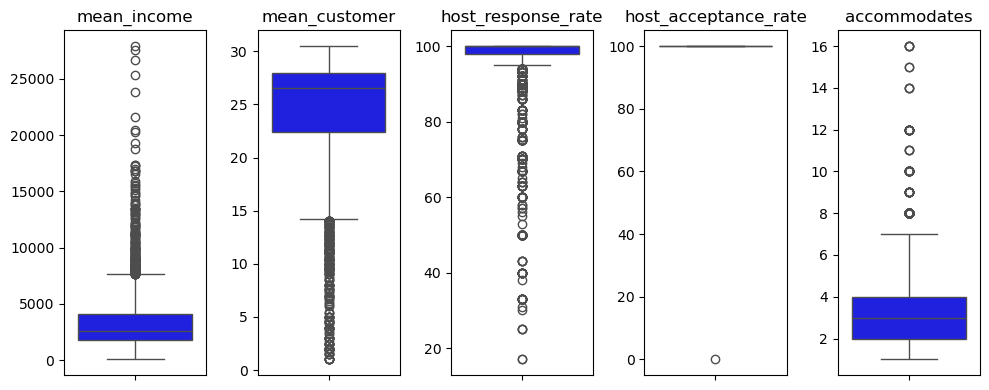

In [82]:
num_cols = 5  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums21) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums21):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='blue', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

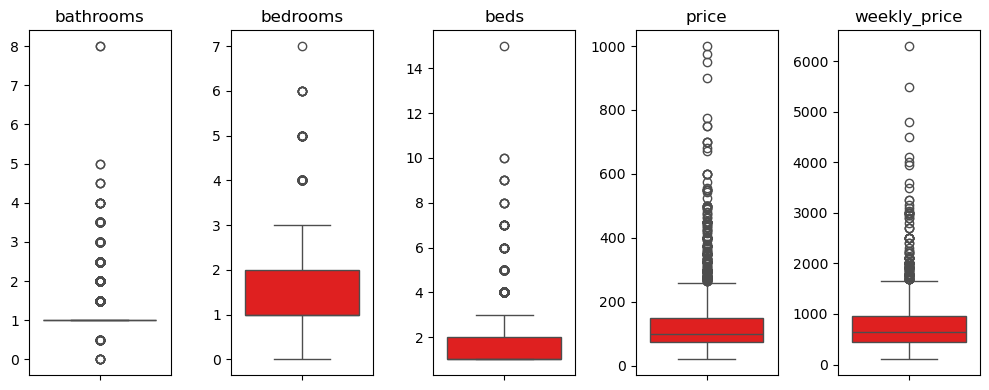

In [84]:
num_cols = 5  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums22) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums22):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='red', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

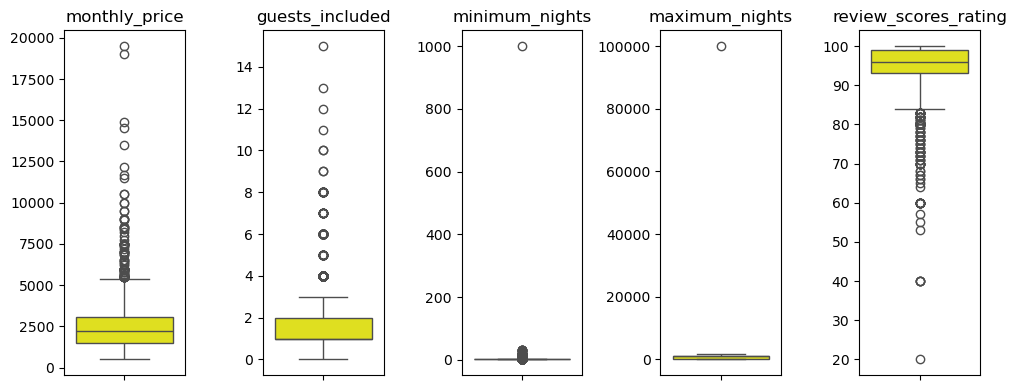

In [86]:
num_cols = 5  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums23) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums23):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='yellow', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

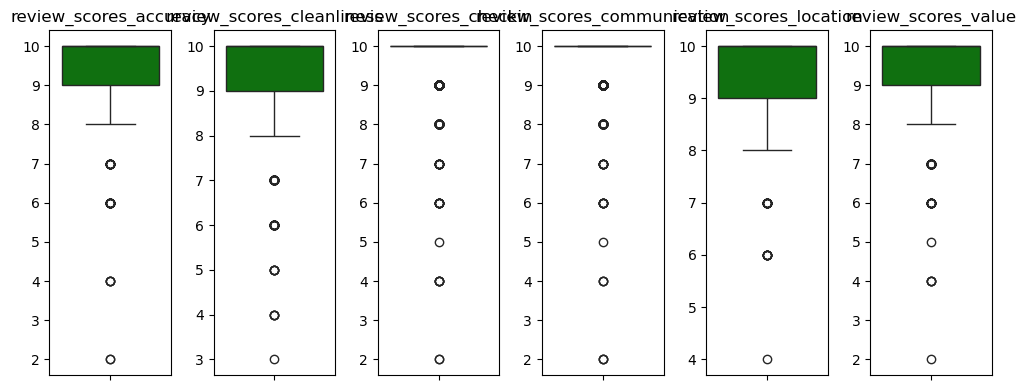

In [88]:
num_cols = 6  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums24) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums24):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='green', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

## Multivariate Analysis

### df2

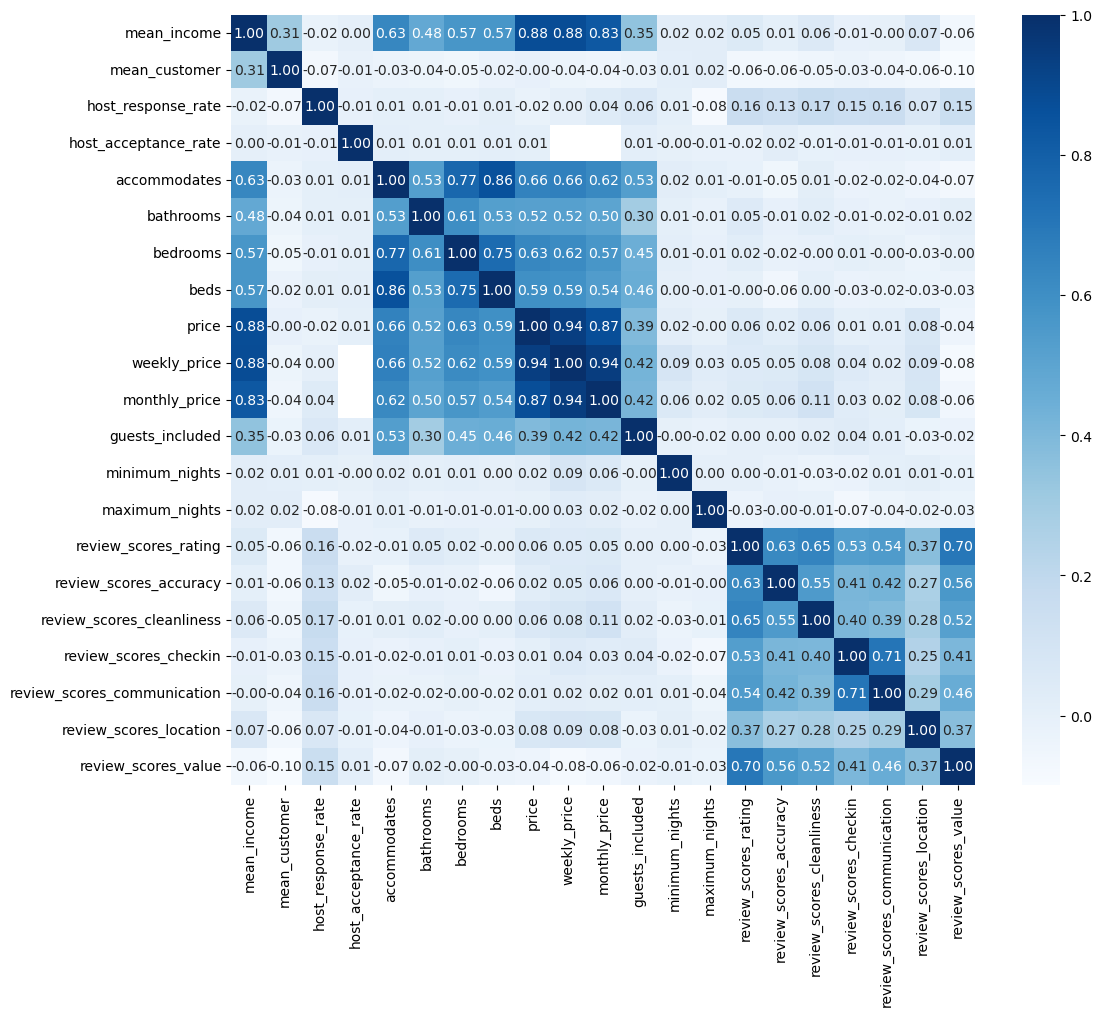

In [92]:
# Memilih hanya kolom numerik dari nums1
numeric_df = df2[['mean_income', 'mean_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()


## Business Insight

In [95]:
df1.tail()

listing_id       date  bulan_num  tahun  pendapatan
744230    10340165 2016-12-29         12   2016        43.0
744231    10340165 2016-12-30         12   2016        43.0
744232    10340165 2016-12-31         12   2016        43.0
744233    10340165 2017-01-01          1   2017        43.0
744234    10340165 2017-01-02          1   2017        43.0

In [97]:
df1g2.head()

listing_id  pendapatan_per_bulan  jumlah_customer
0        3335                 120.0                1
1        3335                3720.0               31
2        3335                3600.0               30
3        3335                3720.0               31
4        3335                3600.0               30

In [99]:
df1_group_tren = df1g [['listing_id', 'bulan_num','pendapatan_per_bulan','jumlah_customer']]

In [101]:
df1_group_tren

listing_id  bulan_num  pendapatan_per_bulan  jumlah_customer
0            3335          2                 120.0                1
1            3335          3                3720.0               31
2            3335          4                3600.0               30
3            3335          5                3720.0               31
4            3335          6                3600.0               30
...           ...        ...                   ...              ...
36110    10340165          9                1290.0               30
36111    10340165         10                1333.0               31
36112    10340165         11                1290.0               30
36113    10340165         12                1333.0               31
36114    10340165          1                  86.0                2

[36115 rows x 4 columns]

In [103]:
df1_group_tren2 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_cust = ('jumlah_customer', sum)).reset_index()

C:\Users\Swift3\AppData\Local\Temp\ipykernel_18120\2264836592.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_group_tren2 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_cust = ('jumlah_customer', sum)).reset_index()


In [105]:
df1_group_tren2

bulan_num  jumlah_cust
0           1        64937
1           2        73321
2           3        83938
3           4        76037
4           5        79971
5           6        77244
6           7        74222
7           8        76347
8           9        77246
9          10        82438
10         11        81780
11         12        87061

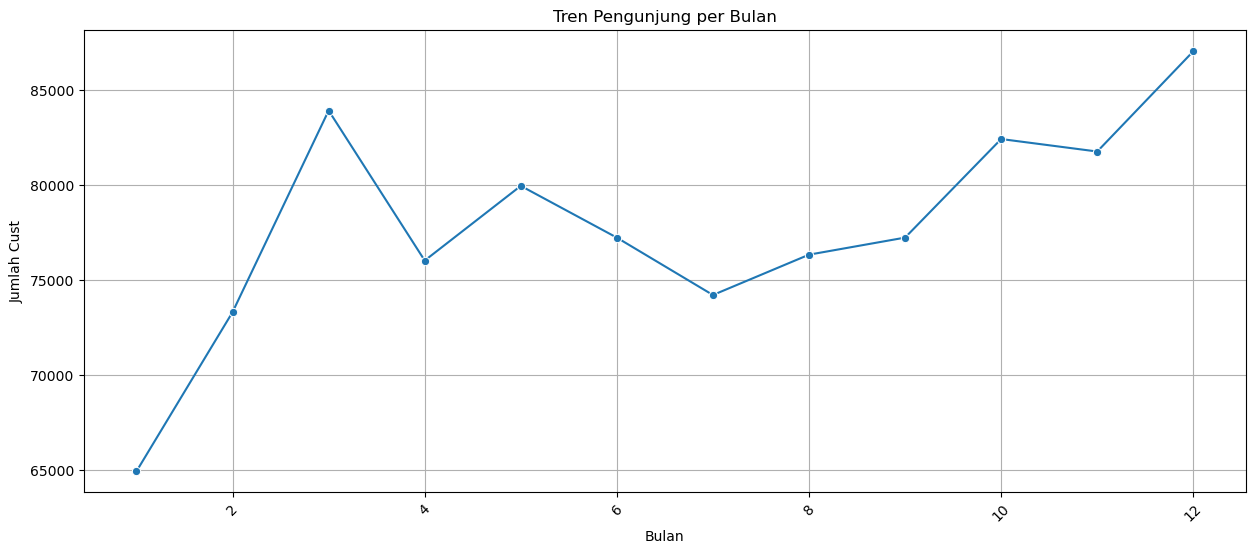

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat plot tren
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1_group_tren2, x='bulan_num', y='jumlah_cust', marker='o')
plt.title('Tren Pengunjung per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Cust')
plt.xticks(rotation=45)  # Jika nama bulan panjang, rotasikan agar lebih terbaca
plt.grid(True)           # Tambahkan grid untuk membantu visualisasi
plt.show()

In [109]:
# Filter data untuk tahun 2017
df1_2017 = df1[df1['tahun'] == 2017]

# Ambil daftar unik bulan di tahun 2017
bulan_2017 = df1_2017['bulan_num'].unique()

# Urutkan bulan jika diperlukan
bulan_2017 = sorted(bulan_2017)

In [111]:
bulan_2017

[1]

In [113]:
# Filter data untuk tahun 2017
df1_2016 = df1[df1['tahun'] == 2016]

# Ambil daftar unik bulan di tahun 2017
bulan_2016 = df1_2016['bulan_num'].unique()

# Urutkan bulan jika diperlukan
bulan_2016 = sorted(bulan_2016)

In [115]:
bulan_2016

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [117]:
df1_group_tren3 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_pendapatan = ('pendapatan_per_bulan', sum)).reset_index()

C:\Users\Swift3\AppData\Local\Temp\ipykernel_18120\3834097144.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_group_tren3 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_pendapatan = ('pendapatan_per_bulan', sum)).reset_index()


In [119]:
df1_group_tren3.head()

bulan_num  jumlah_pendapatan
0          1          7981548.0
1          2          9113355.0
2          3         10798161.0
3          4         10272371.0
4          5         11159008.0

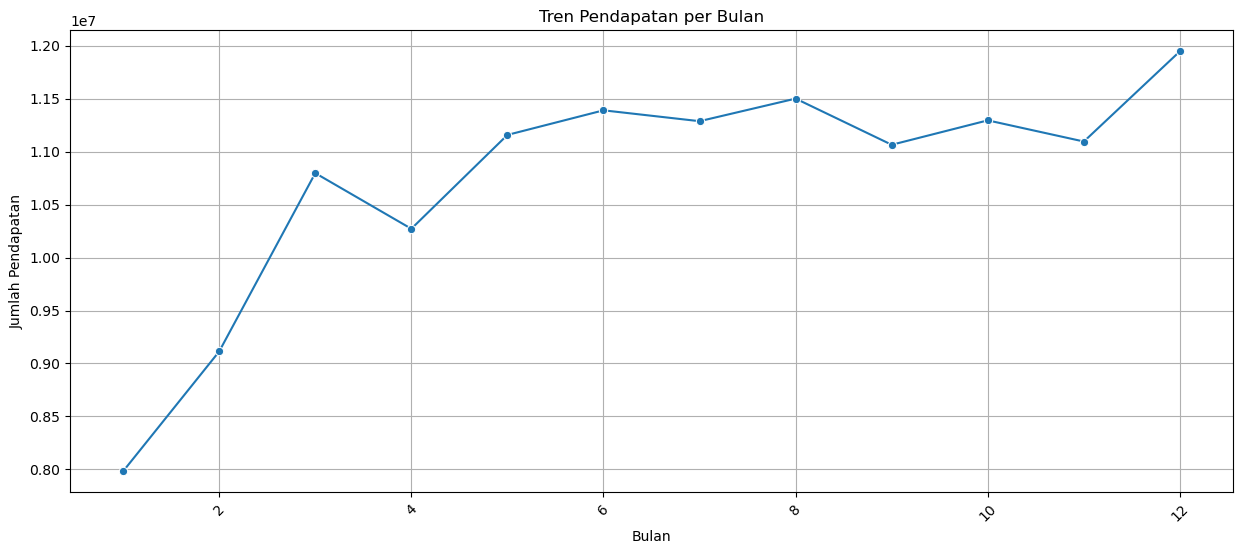

In [121]:
# Buat plot tren
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1_group_tren3, x='bulan_num', y='jumlah_pendapatan', marker='o')
plt.title('Tren Pendapatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pendapatan')
plt.xticks(rotation=45)  # Jika nama bulan panjang, rotasikan agar lebih terbaca
plt.grid(True)           # Tambahkan grid untuk membantu visualisasi
plt.show()

In [123]:
df1g.head()

listing_id  tahun  bulan_num  pendapatan_per_bulan  median_price  \
0        3335   2016          2                 120.0         120.0   
1        3335   2016          3                3720.0         120.0   
2        3335   2016          4                3600.0         120.0   
3        3335   2016          5                3720.0         120.0   
4        3335   2016          6                3600.0         120.0   

   jumlah_customer  
0                1  
1               31  
2               30  
3               31  
4               30

In [125]:
df1_juni = df1[df1['bulan_num'] == 6]
df1_juni.head()

listing_id       date  bulan_num  tahun  pendapatan
797309        3335 2016-06-01          6   2016       120.0
797310        3335 2016-06-02          6   2016       120.0
797311        3335 2016-06-03          6   2016       120.0
797312        3335 2016-06-04          6   2016       120.0
797313        3335 2016-06-05          6   2016       120.0

In [127]:
df1_juni.describe()

listing_id                           date  bulan_num    tahun  \
count  7.724400e+04                          77244    77244.0  77244.0   
mean   5.170853e+06  2016-06-15 13:29:23.368028672        6.0   2016.0   
min    3.335000e+03            2016-06-01 00:00:00        6.0   2016.0   
25%    2.693137e+06            2016-06-08 00:00:00        6.0   2016.0   
50%    5.324459e+06            2016-06-16 00:00:00        6.0   2016.0   
75%    7.793293e+06            2016-06-23 00:00:00        6.0   2016.0   
max    1.034016e+07            2016-06-30 00:00:00        6.0   2016.0   
std    2.985627e+06                            NaN        0.0      0.0   

         pendapatan  
count  77244.000000  
mean     147.473137  
min       20.000000  
25%       76.000000  
50%      110.000000  
75%      175.000000  
max     1099.000000  
std      112.481803

In [129]:
df1_may = df1[df1['bulan_num'] == 5]
df1_juni.head()

listing_id       date  bulan_num  tahun  pendapatan
797309        3335 2016-06-01          6   2016       120.0
797310        3335 2016-06-02          6   2016       120.0
797311        3335 2016-06-03          6   2016       120.0
797312        3335 2016-06-04          6   2016       120.0
797313        3335 2016-06-05          6   2016       120.0

In [131]:
df1_may.describe()

listing_id                           date  bulan_num    tahun  \
count  7.997100e+04                          79971    79971.0  79971.0   
mean   5.234380e+06  2016-05-16 00:15:43.181903360        5.0   2016.0   
min    3.335000e+03            2016-05-01 00:00:00        5.0   2016.0   
25%    2.761092e+06            2016-05-08 00:00:00        5.0   2016.0   
50%    5.395530e+06            2016-05-16 00:00:00        5.0   2016.0   
75%    7.859909e+06            2016-05-24 00:00:00        5.0   2016.0   
max    1.034016e+07            2016-05-31 00:00:00        5.0   2016.0   
std    2.989867e+06                            NaN        0.0      0.0   

         pendapatan  
count  79971.000000  
mean     139.538183  
min       20.000000  
25%       75.000000  
50%      110.000000  
75%      169.000000  
max     1099.000000  
std      102.863280

In [133]:
df2_customer = df2[['listing_id','mean_income', 'mean_customer']]

In [135]:
df2_customer_terendah = df2_customer.sort_values(by='mean_customer', ascending=True)

In [137]:
df2_customer_terendah.head(10)

listing_id  mean_income  mean_customer
3717    10319529         49.0            1.0
3687    10210625         90.0            1.0
3562     9714078         89.0            1.0
3535     9636238        120.0            1.0
3604     9868607        325.0            1.0
1121     3819831         82.0            1.0
261       656909         64.0            1.0
3696    10235136         50.0            1.0
1786     5893969        117.5            1.5
1558     5041669        142.5            1.5

In [139]:
print(df2_customer_terendah.head(10).to_markdown())

|      |       listing_id |   mean_income |   mean_customer |
|-----:|-----------------:|--------------:|----------------:|
| 3717 |      1.03195e+07 |          49   |             1   |
| 3687 |      1.02106e+07 |          90   |             1   |
| 3562 |      9.71408e+06 |          89   |             1   |
| 3535 |      9.63624e+06 |         120   |             1   |
| 3604 |      9.86861e+06 |         325   |             1   |
| 1121 |      3.81983e+06 |          82   |             1   |
|  261 | 656909           |          64   |             1   |
| 3696 |      1.02351e+07 |          50   |             1   |
| 1786 |      5.89397e+06 |         117.5 |             1.5 |
| 1558 |      5.04167e+06 |         142.5 |             1.5 |


In [141]:
df2_customer_tertinggi = df2_customer.sort_values(by='mean_customer', ascending=False)

In [143]:
df2_customer_tertinggi.head()

listing_id  mean_income  mean_customer
970      3352685      6100.00          30.50
39         48319      6710.00          30.50
2681     7858454      4537.50          30.25
1952     6363765      5408.60          30.20
3143     8765219      3945.75          30.00

In [145]:
df2_pendapatan = df2[['listing_id','mean_income', 'mean_customer']]

In [147]:
df2_pendapatan_terendah = df2_pendapatan.sort_values(by='mean_income', ascending=True)

In [149]:
df2_pendapatan_terendah.head(10)

listing_id  mean_income  mean_customer
3717    10319529         49.0            1.0
3696    10235136         50.0            1.0
261       656909         64.0            1.0
2639     7798575         76.0            2.0
1121     3819831         82.0            1.0
3562     9714078         89.0            1.0
3687    10210625         90.0            1.0
207       458197         96.0            2.0
2775     8006745         97.5            1.5
205       458191         98.0            2.0

In [151]:
print(df2_pendapatan_terendah.head(10).to_markdown())

|      |       listing_id |   mean_income |   mean_customer |
|-----:|-----------------:|--------------:|----------------:|
| 3717 |      1.03195e+07 |          49   |             1   |
| 3696 |      1.02351e+07 |          50   |             1   |
|  261 | 656909           |          64   |             1   |
| 2639 |      7.79858e+06 |          76   |             2   |
| 1121 |      3.81983e+06 |          82   |             1   |
| 3562 |      9.71408e+06 |          89   |             1   |
| 3687 |      1.02106e+07 |          90   |             1   |
|  207 | 458197           |          96   |             2   |
| 2775 |      8.00674e+06 |          97.5 |             1.5 |
|  205 | 458191           |          98   |             2   |


In [153]:
df2_pendapatan_tertinggi = df2_pendapatan.sort_values(by='mean_income', ascending=False)

In [155]:
df2_pendapatan_tertinggi.head()

listing_id   mean_income  mean_customer
2602     7733192  27918.538462      27.615385
1498     4825073  27538.461538      27.538462
810      2720963  26673.076923      28.076923
1372     4464824  25347.538462      27.846154
961      3308979  23866.666667      18.333333

In [157]:
df2_rating = df2[['listing_id','mean_income', 'mean_customer','review_scores_rating']]

In [159]:
df2_rating_tertinggi =df2_rating.sort_values(by='review_scores_rating', ascending=False)

In [161]:
df2_rating_tertinggi.head(10)

listing_id   mean_income  mean_customer  review_scores_rating
3698    10248139    180.000000       8.500000                 100.0
2681     7858454   4537.500000      30.250000                 100.0
1046     3585592   4074.285714      26.285714                 100.0
1051     3604931  11346.923077      22.923077                 100.0
2705     7901318   2254.000000      23.000000                 100.0
2704     7900497   2210.000000      26.000000                 100.0
2702     7887651   2218.857143      25.000000                 100.0
2696     7875887   2504.230769      27.615385                 100.0
2692     7873208    684.583333      23.583333                 100.0
1079     3691288   3714.000000      22.153846                 100.0

In [163]:
df2_rating_terendah =df2_rating.sort_values(by='review_scores_rating', ascending=True)

In [165]:
df2_rating_terendah.head(10)

listing_id  mean_income  mean_customer  review_scores_rating
3329     9183838     2725.000      28.500000                  20.0
3022     8474294      702.000       8.000000                  40.0
3311     9151374     2905.000      27.666667                  40.0
3312     9151865     2160.000      22.000000                  40.0
1726     5639238     2970.000      27.000000                  40.0
1517     4892529     6543.125      25.375000                  53.0
1956     6370313     5540.250      22.250000                  55.0
3273     9075558      490.000      13.750000                  57.0
2601     7732071     2709.000      21.000000                  60.0
3138     8754180     3325.000      19.000000                  60.0

# STAGE 2

## Handling missing value dan data duplicate

In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3243 non-null   object 
 6   host_response_rate                3243 non-null   float64
 7   host_acceptance_rate              3000 non-null   float64
 8   host_is_superhost                 3721 non-null   object 
 9   host_identity_verified            3721 non-null   object 
 10  zipcode                           3716 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [171]:
print(df2.isna().sum().to_markdown())

|                                  |    0 |
|:---------------------------------|-----:|
| listing_id                       |    0 |
| mean_income                      |    0 |
| mean_customer                    |    0 |
| name                             |    0 |
| host_id                          |    0 |
| host_response_time               |  480 |
| host_response_rate               |  480 |
| host_acceptance_rate             |  723 |
| host_is_superhost                |    2 |
| host_identity_verified           |    2 |
| zipcode                          |    7 |
| latitude                         |    0 |
| longitude                        |    0 |
| is_location_exact                |    0 |
| property_type                    |    1 |
| room_type                        |    0 |
| accommodates                     |    0 |
| bathrooms                        |   16 |
| bedrooms                         |    6 |
| beds                             |    1 |
| bed_type                      

In [173]:
# Handiling weekly_price dan Monthly_price
df2['weekly_price'] = df2['weekly_price'].fillna(0)
df2['monthly_price'] = df2['monthly_price'].fillna(0)

# Handling review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, 
# review_scores_location,review_scores_value 
for col in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
    df2[col] = df2.groupby('room_type')[col].transform(lambda x: x.fillna(x.median()))

# Handling host_response_time dan host_acceptance_rate, bathrooms, bedrooms, beds
df2['host_response_rate'] = df2['host_response_rate'].fillna(df2['host_response_rate'].median())
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].fillna(df2['host_acceptance_rate'].median())
df2['bathrooms'] = df2['bathrooms'].fillna(df2['bathrooms'].median())
df2['bedrooms'] = df2['bedrooms'].fillna(df2['bedrooms'].median())
df2['beds'] = df2['beds'].fillna(df2['beds'].median())


df2['host_response_time'] = df2['host_response_time'].fillna(df2['host_response_time'].mode()[0])
df2['host_identity_verified'] = df2['host_identity_verified'].fillna(df2['host_identity_verified'].mode()[0])
df2['host_is_superhost'] = df2['host_is_superhost'].fillna(df2['host_is_superhost'].mode()[0])
df2['property_type'] = df2['property_type'].fillna(df2['property_type'].mode()[0])

In [175]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


Untuk handling data zipcode tidak bisa dilakukan dengan mengandalkan data mean, medaian, mode saja karena datanya berkaitan erat dangan latitude dan longitude maka dari itu agar zipcode yang kosong terisi dengan nilai yang sesuai maka dibutuhkan library Reverse Geocoding 

In [177]:
from geopy.geocoders import Nominatim

# Inisialisasi geolocator
geolocator = Nominatim(user_agent="geoapi")

# Fungsi untuk mendapatkan zipcode dari latitude dan longitude
def get_zipcode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en')
        if location and 'postcode' in location.raw['address']:
            return location.raw['address']['postcode']
    except:
        return None

# Mengisi missing values di zipcode
for index, row in df2[df2['zipcode'].isnull()].iterrows():
    zipcode = get_zipcode(row['latitude'], row['longitude'])
    if zipcode:
        df2.at[index, 'zipcode'] = zipcode

In [178]:
print(df2.isna().sum().to_markdown())

|                                  |   0 |
|:---------------------------------|----:|
| listing_id                       |   0 |
| mean_income                      |   0 |
| mean_customer                    |   0 |
| name                             |   0 |
| host_id                          |   0 |
| host_response_time               |   0 |
| host_response_rate               |   0 |
| host_acceptance_rate             |   0 |
| host_is_superhost                |   0 |
| host_identity_verified           |   0 |
| zipcode                          |   0 |
| latitude                         |   0 |
| longitude                        |   0 |
| is_location_exact                |   0 |
| property_type                    |   0 |
| room_type                        |   0 |
| accommodates                     |   0 |
| bathrooms                        |   0 |
| bedrooms                         |   0 |
| beds                             |   0 |
| bed_type                         |   0 |
| price    

## Handle Outlier & Feature Transformation

In [183]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_response_rate                3723 non-null   float64
 7   host_acceptance_rate              3723 non-null   float64
 8   host_is_superhost                 3723 non-null   object 
 9   host_identity_verified            3723 non-null   object 
 10  zipcode                           3723 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [185]:
df2_without_id_2 = df2.drop(columns=['listing_id'])
nums2ver2 = df2_without_id_2.select_dtypes(include=['float64', 'int64'])

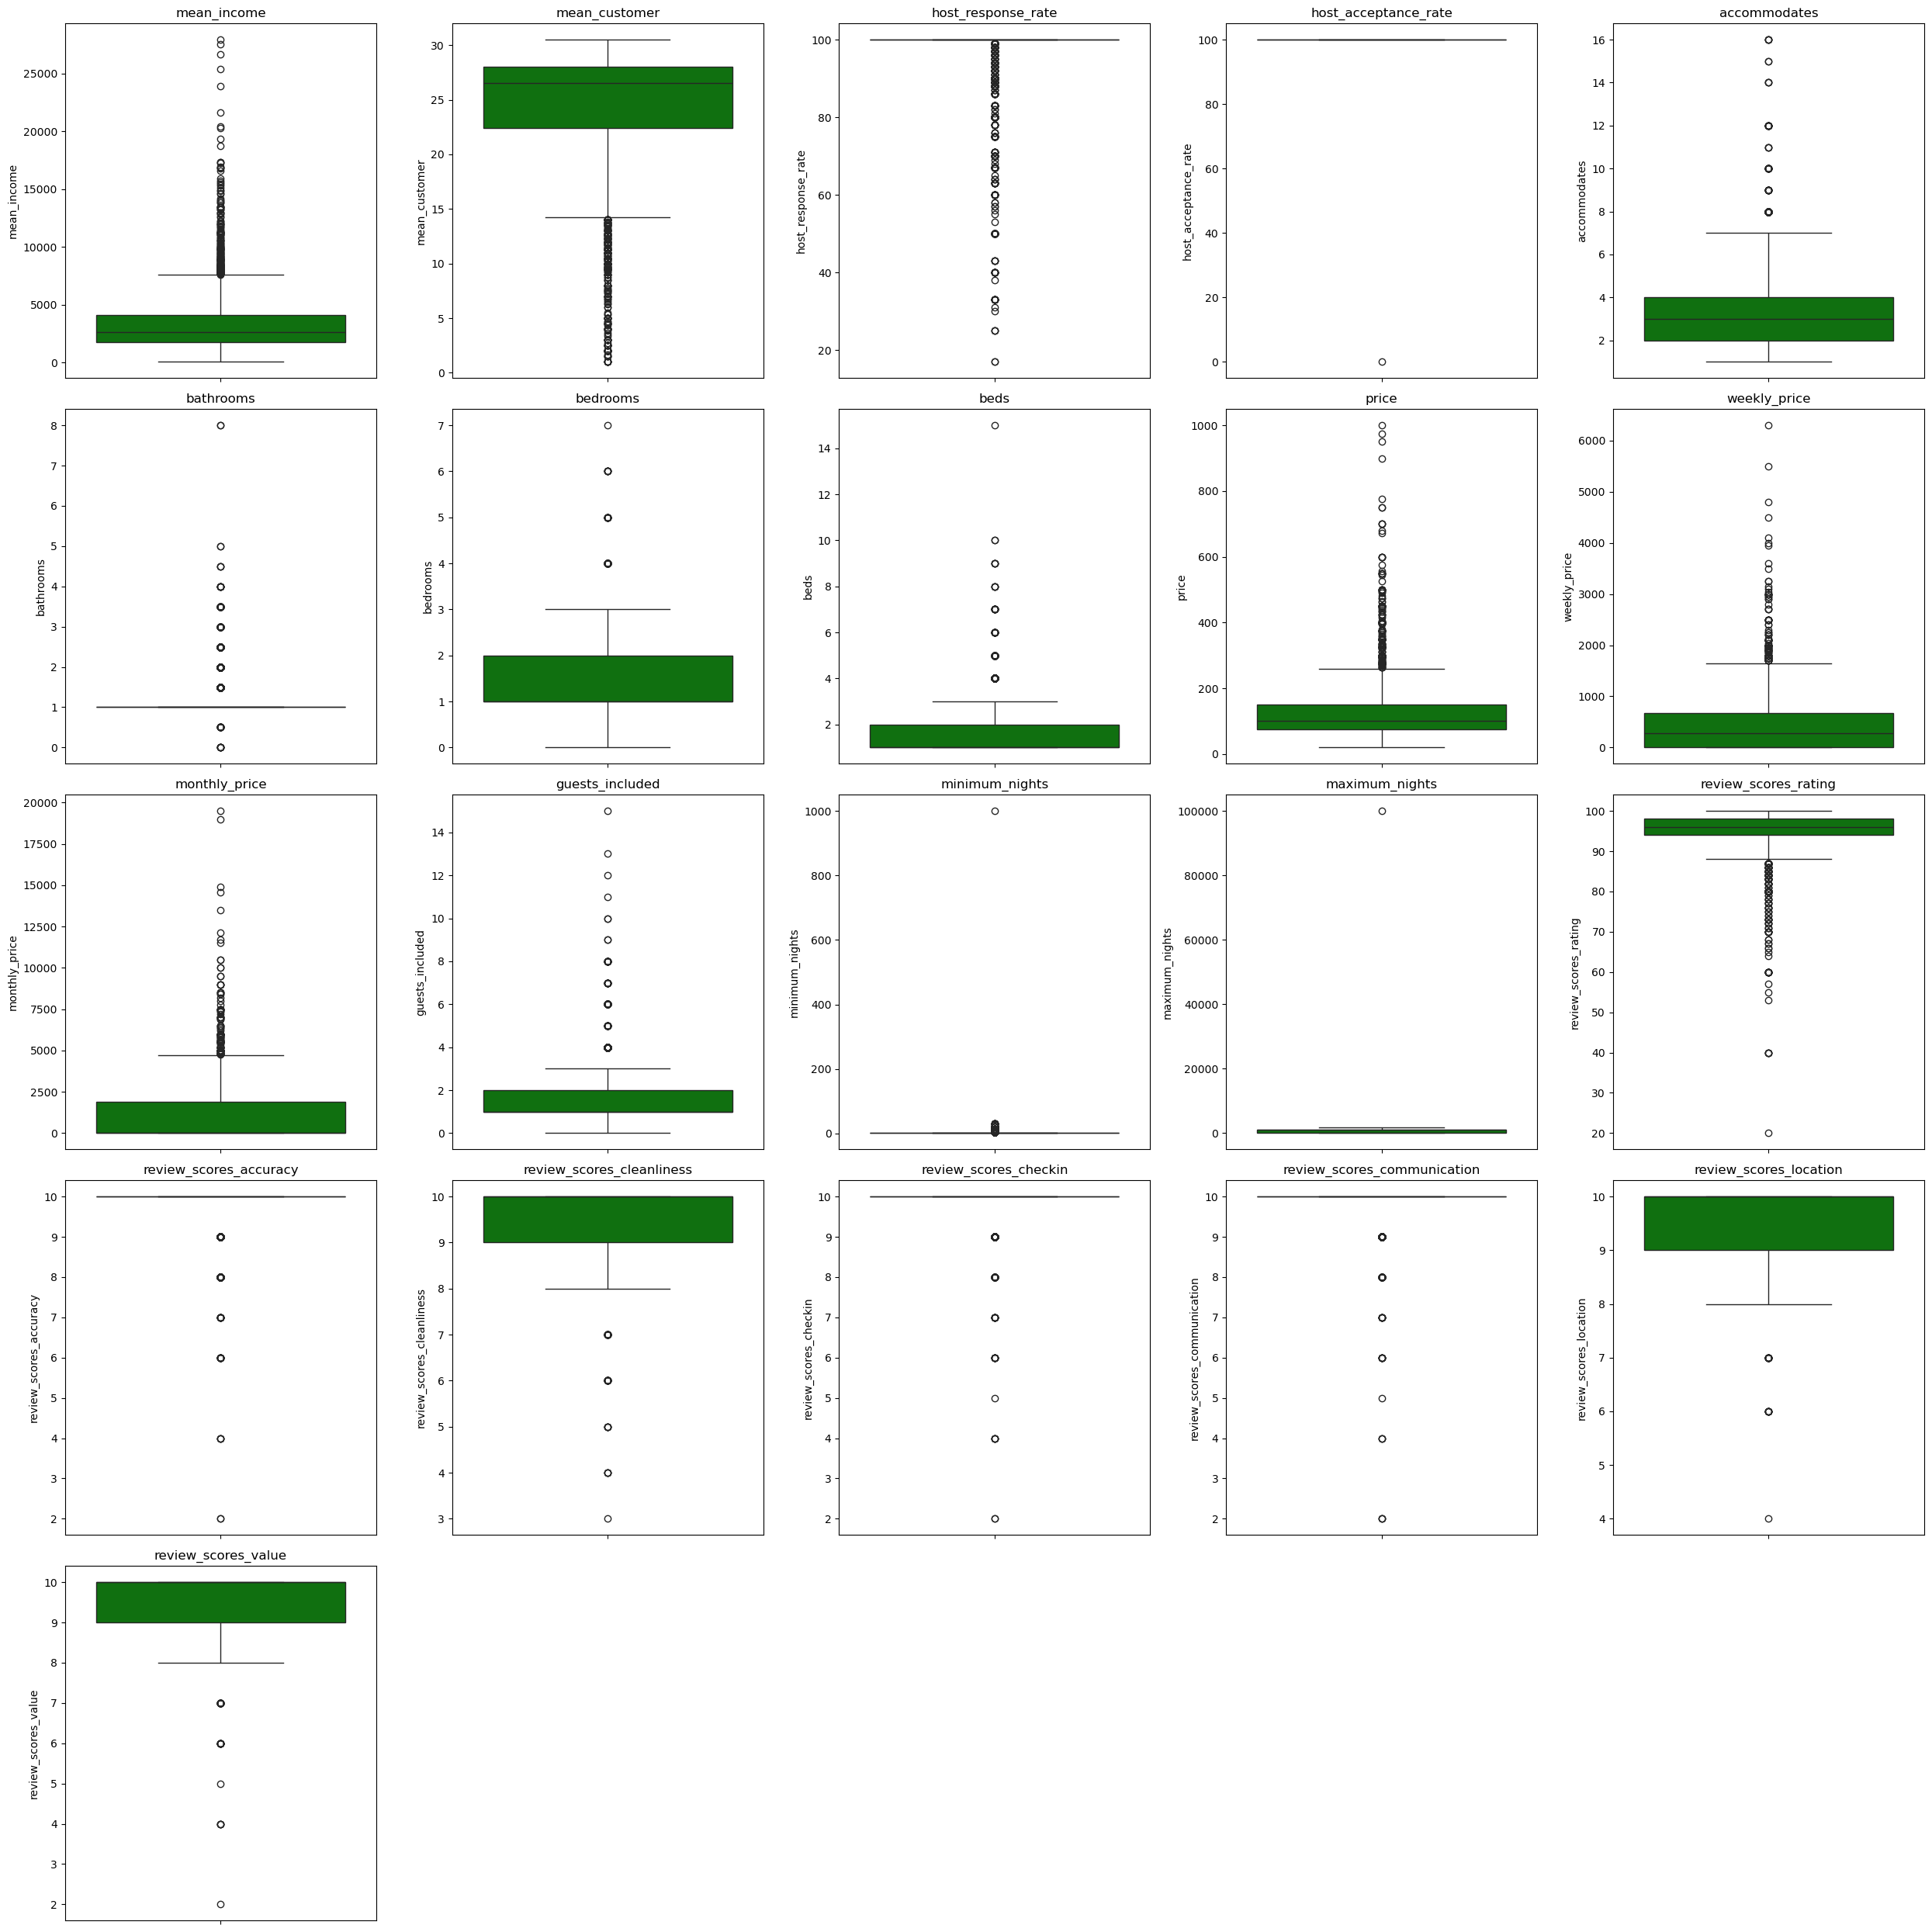

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Jumlah boxplot per baris
cols_per_row = 5  
num_cols = len(nums2ver2.columns)
num_rows = math.ceil(num_cols / cols_per_row)  # Hitung jumlah baris

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))  # Sesuaikan ukuran figure

for i, col in enumerate(nums2ver2.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)  # Subplot berdasarkan grid
    sns.boxplot(y=nums2ver2[col], color='green', orient='v')
    plt.title(col)  # Tambahkan judul tiap boxplot

plt.tight_layout()  # Atur tata letak agar tidak tumpang tindih
plt.show()


In [189]:
# Menentukan fungsi untuk mengubah skor persentase menjadi kategori
def categorize_score(score):
    if 0 <= score <= 30:
        return 'Sangat Buruk'
    elif 31 <= score <= 60:
        return 'Buruk'
    elif 61 <= score <= 80:
        return 'Sedang'
    elif 81 <= score <= 90:
        return 'Baik'
    elif 91 <= score <= 100:
        return 'Sangat Baik'
    else:
        return 'Tidak Valid'

# Terapkan fungsi ini ke kolom review_scores_rating, host_response_rate, host_acceptance_rate di df2
df2['review_scores_rating_kategori'] = df2['review_scores_rating'].apply(categorize_score)
df2['host_response_rate_kategori'] = df2['host_response_rate'].apply(categorize_score)
df2['host_acceptance_rate_kategori'] = df2['host_acceptance_rate'].apply(categorize_score)

# Cek hasilnya
print(df2[['review_scores_rating', 'review_scores_rating_kategori', 
           'host_response_rate', 'host_response_rate_kategori', 
           'host_acceptance_rate', 'host_acceptance_rate_kategori']].head())


   review_scores_rating review_scores_rating_kategori  host_response_rate  \
0                  96.0                   Sangat Baik                88.0   
1                  92.0                   Sangat Baik               100.0   
2                  96.0                   Sangat Baik               100.0   
3                  93.0                   Sangat Baik                90.0   
4                  94.0                   Sangat Baik               100.0   

  host_response_rate_kategori  host_acceptance_rate  \
0                        Baik                 100.0   
1                 Sangat Baik                 100.0   
2                 Sangat Baik                 100.0   
3                        Baik                 100.0   
4                 Sangat Baik                 100.0   

  host_acceptance_rate_kategori  
0                   Sangat Baik  
1                   Sangat Baik  
2                   Sangat Baik  
3                   Sangat Baik  
4                   Sangat Baik  


In [191]:
df2.drop(columns=['review_scores_rating', 'host_response_rate', 'host_acceptance_rate'], inplace=True)

In [193]:
df2.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425      within an hour   

  host_is_superhost host_identity_verified zipcode           latitude  ...  \
0                 f                      t   98118  47.52984647440817  ...   
1                 f                      t   98115  47.68725100864705  ...   
2                 f                      t   98106  47.52397950434662  ...   
3                 f                      t   98103   47.6541086069472  ...   
4                 f                      f   98122  47.61539737810128  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        10.0                   10.0                10.0   
1                         9.0                    9.0                 9.0   
2                        10.0                    9.0                10.0   
3                         9.0                   10.0                 9.0   
4                        10.0                   10.0                 9.0   

  instant_bookable  cancellation_policy  require_guest_profile_picture  \
0                f               strict                              f   
1                f             moderate                              f   
2                t               strict                              f   
3                f               strict                              f   
4                f             flexible                              f   

   require_guest_phone_verification  review_scores_rating_kategori  \
0                                 f                    Sangat Baik   
1                                 f                    Sangat Baik   
2                                 t                    Sangat Baik   
3                                 f                    Sangat Baik   
4                                 f                    Sangat Baik   

  host_response_rate_kategori  host_acceptance_rate_kategori  
0                        Baik                    Sangat Baik  
1                 Sangat Baik                    Sangat Baik  
2                 Sangat Baik                    Sangat Baik  
3                        Baik                    Sangat Baik  
4                 Sangat Baik                    Sangat Baik  

[5 rows x 38 columns]

In [195]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_identity_verified            3723 non-null   object 
 8   zipcode                           3723 non-null   object 
 9   latitude                          3723 non-null   object 
 10  longitude                         3723 non-null   object 
 11  is_location_exact                 3723 non-null   object 
 12  proper

In [197]:
import numpy as np

# Daftar kolom yang ingin ditransformasi dengan log
log_columns = [
    'accommodates', 'bathrooms', 'bedrooms', 
    'beds', 'price', 'weekly_price', 'monthly_price', 
    'guests_included', 'minimum_nights', 'maximum_nights'
]

# Terapkan log transformation pada kolom yang dipilih
for col in log_columns:
    df2[col + '_log'] = np.log(df2[col] + 1)  # Menambahkan 1 untuk menghindari log(0)

In [199]:
df2.head()

listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id  host_response_time  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193  within a few hours   
1      Sunrise in Seattle Master Suite   35749        within a day   
2  Cozy Studio, min. to downtown -WiFi    8993      within an hour   
3  Fab, private seattle urban cottage!   14942  within a few hours   
4             launchingpad/landingpad    19425      within an hour   

  host_is_superhost host_identity_verified zipcode           latitude  ...  \
0                 f                      t   98118  47.52984647440817  ...   
1                 f                      t   98115  47.68725100864705  ...   
2                 f                      t   98106  47.52397950434662  ...   
3                 f                      t   98103   47.6541086069472  ...   
4                 f                      f   98122  47.61539737810128  ...   

  accommodates_log bathrooms_log bedrooms_log  beds_log  price_log  \
0         1.609438      0.693147     1.098612  1.098612   4.795791   
1         1.098612      0.693147     0.693147  0.693147   4.418841   
2         1.098612      0.693147     0.693147  0.693147   3.891820   
3         1.098612      0.693147     0.693147  0.693147   4.510860   
4         1.098612      0.693147     0.693147  0.693147   4.454347   

   weekly_price_log  monthly_price_log  guests_included_log  \
0          6.311735           7.378384             1.098612   
1          6.265301           7.563201             0.693147   
2          5.929589           7.131699             0.693147   
3          6.508769           0.000000             1.098612   
4          0.000000           0.000000             0.693147   

  minimum_nights_log  maximum_nights_log  
0           1.098612            6.594413  
1           1.098612            4.110874  
2           1.386294            3.367296  
3           1.098612            7.026427  
4           0.693147            7.026427  

[5 rows x 48 columns]

In [201]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_identity_verified            3723 non-null   object 
 8   zipcode                           3723 non-null   object 
 9   latitude                          3723 non-null   object 
 10  longitude                         3723 non-null   object 
 11  is_location_exact                 3723 non-null   object 
 12  proper

In [203]:
df2.drop(columns=log_columns, inplace=True)

In [205]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   mean_income                       3723 non-null   float64
 2   mean_customer                     3723 non-null   float64
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_identity_verified            3723 non-null   object 
 8   zipcode                           3723 non-null   object 
 9   latitude                          3723 non-null   object 
 10  longitude                         3723 non-null   object 
 11  is_location_exact                 3723 non-null   object 
 12  proper

In [207]:
df2['weekly_price_log'] = df2['weekly_price_log'].fillna(0)
df2['monthly_price_log'] = df2['monthly_price_log'].fillna(0)

In [209]:
df2_without_id_2 = df2.drop(columns=['listing_id'])
nums2ver2 = df2_without_id_2.select_dtypes(include=['float64', 'int64'])

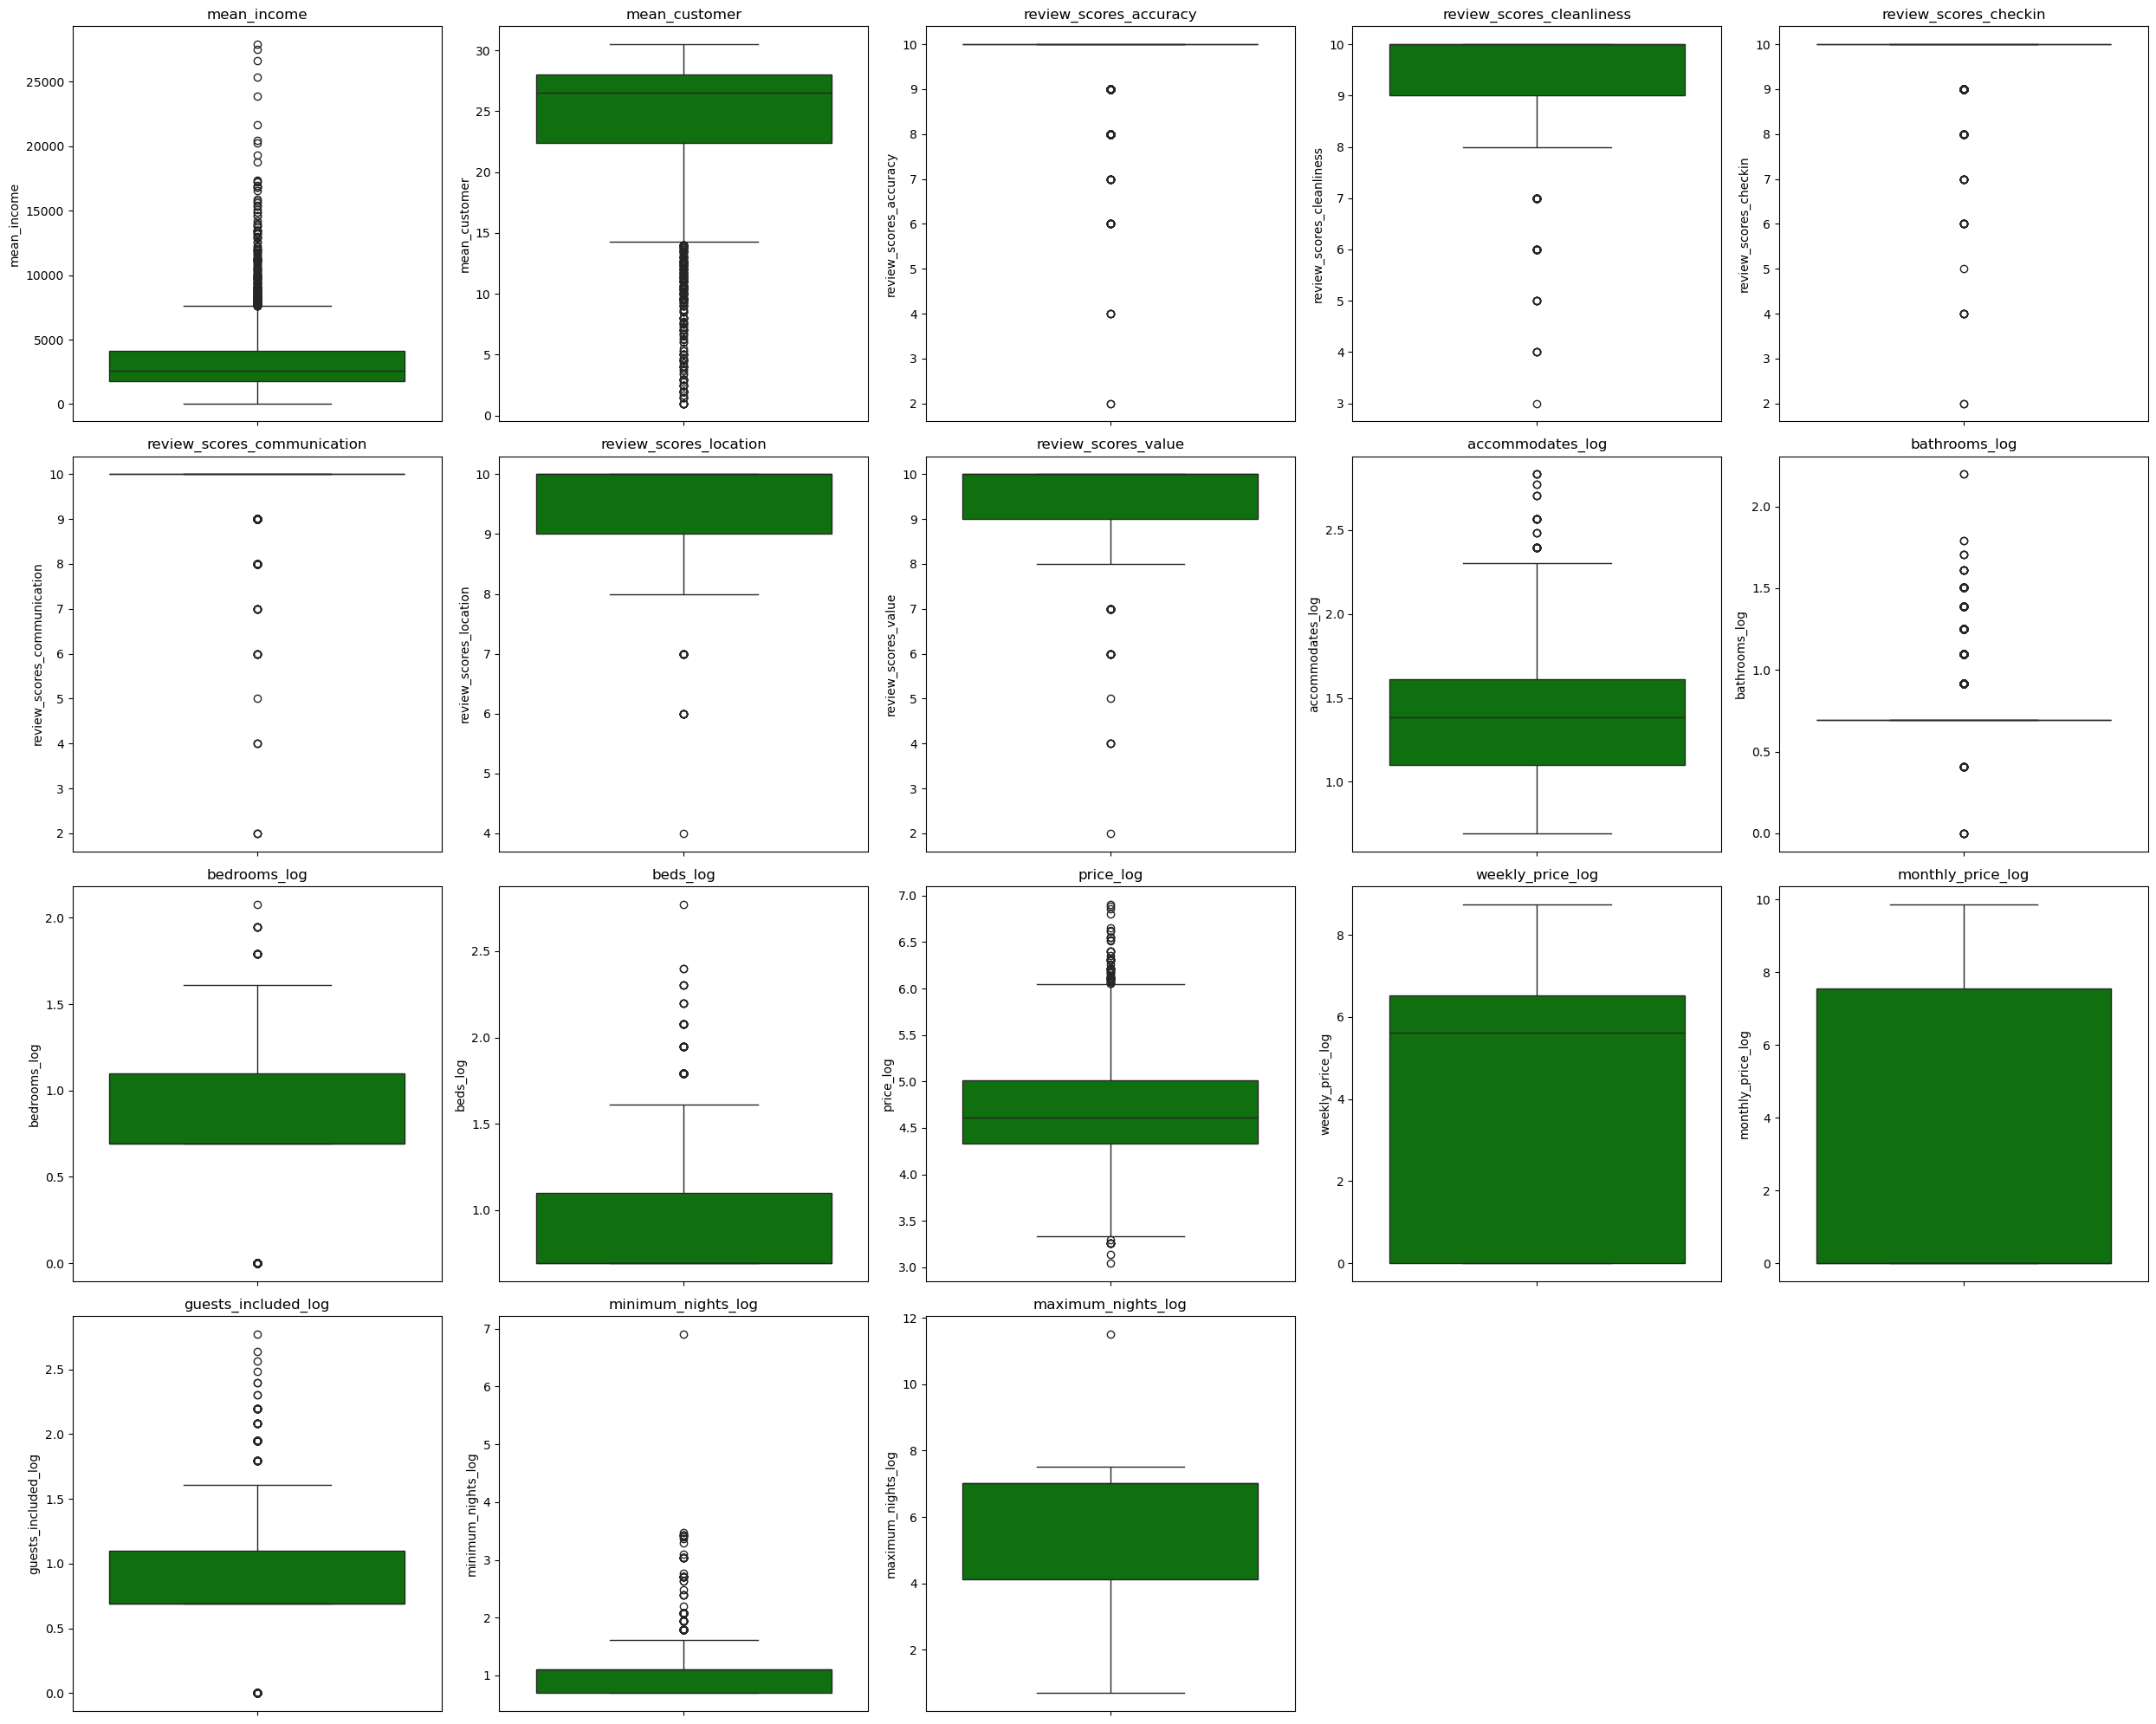

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Jumlah boxplot per baris
cols_per_row = 5  
num_cols = len(nums2ver2.columns)
num_rows = math.ceil(num_cols / cols_per_row)  # Hitung jumlah baris

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))  # Sesuaikan ukuran figure

for i, col in enumerate(nums2ver2.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)  # Subplot berdasarkan grid
    sns.boxplot(y=nums2ver2[col], color='green', orient='v')
    plt.title(col)  # Tambahkan judul tiap boxplot

plt.tight_layout()  # Atur tata letak agar tidak tumpang tindih
plt.show()

# Feature Encoding

In [214]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding untuk kolom kategorikal nominal
nominal_columns = ['host_response_time', 'host_is_superhost', 'host_identity_verified', 
                  'is_location_exact', 'property_type', 'room_type', 'bed_type', 
                  'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',
                  'require_guest_phone_verification']

# Looping untuk melakukan One-Hot Encoding
for column in nominal_columns:
    # Buat dummy variables
    dummies = pd.get_dummies(df2[column], prefix=column, drop_first=True)  
    # Gabungkan dummy variables dengan dataframe asli
    df2 = pd.concat([df2, dummies], axis=1)
    # Hapus kolom asli
    df2.drop(columns=[column], inplace=True)

In [216]:
# Label Encoding untuk kolom kategorikal ordinal
ordinal_columns = ['review_scores_rating_kategori', 'host_response_rate_kategori', 'host_acceptance_rate_kategori']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Looping untuk melakukan Label Encoding
for column in ordinal_columns:
    # Fit dan transform data
    df2[column] = label_encoder.fit_transform(df2[column])

In [218]:
df2.isna().sum()

listing_id                               0
mean_income                              0
mean_customer                            0
name                                     0
host_id                                  0
zipcode                                  0
latitude                                 0
longitude                                0
review_scores_accuracy                   0
review_scores_cleanliness                0
review_scores_checkin                    0
review_scores_communication              0
review_scores_location                   0
review_scores_value                      0
review_scores_rating_kategori            0
host_response_rate_kategori              0
host_acceptance_rate_kategori            0
accommodates_log                         0
bathrooms_log                            0
bedrooms_log                             0
beds_log                                 0
price_log                                0
weekly_price_log                         0
monthly_pri

In [220]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             3723 non-null   int64  
 1   mean_income                            3723 non-null   float64
 2   mean_customer                          3723 non-null   float64
 3   name                                   3723 non-null   object 
 4   host_id                                3723 non-null   object 
 5   zipcode                                3723 non-null   object 
 6   latitude                               3723 non-null   object 
 7   longitude                              3723 non-null   object 
 8   review_scores_accuracy                 3723 non-null   float64
 9   review_scores_cleanliness              3723 non-null   float64
 10  review_scores_checkin                  3723 non-null   float64
 11  revi

# FEATURE SELECTION

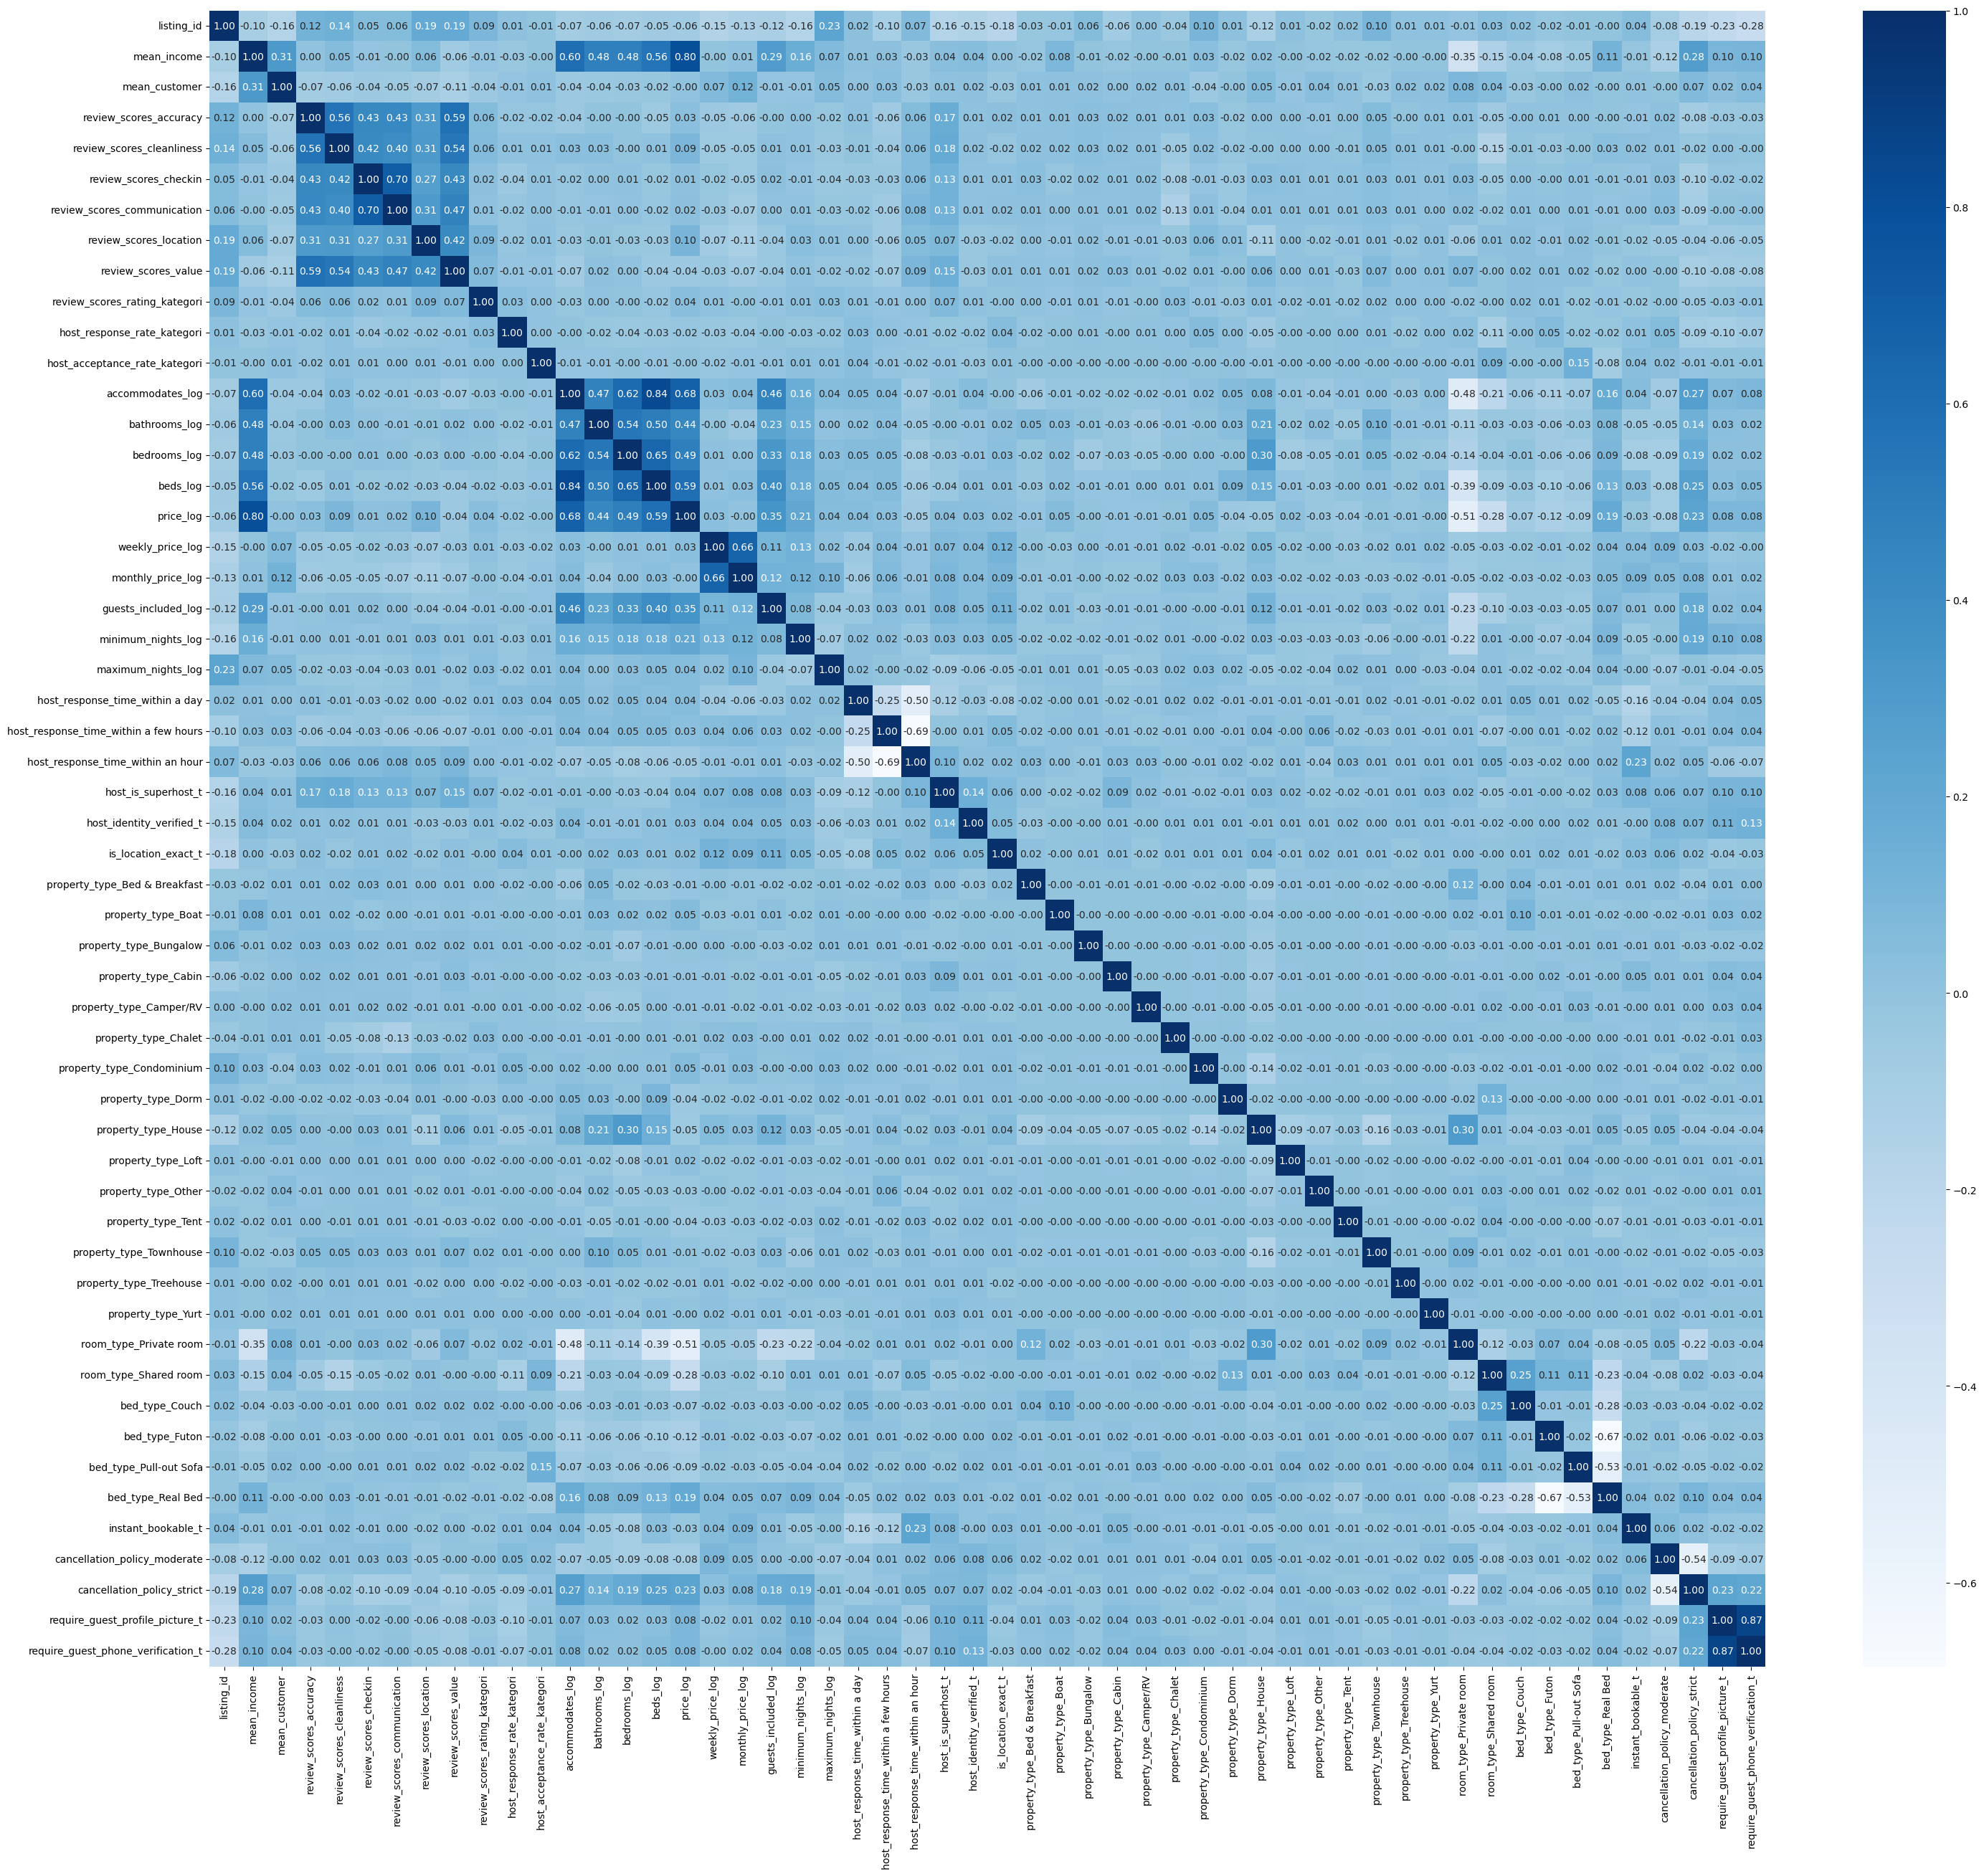

In [223]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

**DROP Feature**

In [226]:
feature_to_drop =['accommodates_log'
                 ]

# Drop fitur dari DataFrame
df2 = df2.drop(columns = feature_to_drop)

# Verifikasi fitur telah dihapus
print(f"Fitur yang di-drop: {feature_to_drop}")
print(df2.head())

Fitur yang di-drop: ['accommodates_log']
   listing_id  mean_income  mean_customer  \
0        3335  3090.000000      25.750000   
1        4291  2302.307692      28.076923   
2        5682  1282.230769      23.769231   
3        6606  2606.923077      28.076923   
4        7369  1126.250000      13.250000   

                                  name host_id zipcode           latitude  \
0  Sweet Seattle Urban Homestead 2 Bdr    4193   98118  47.52984647440817   
1      Sunrise in Seattle Master Suite   35749   98115  47.68725100864705   
2  Cozy Studio, min. to downtown -WiFi    8993   98106  47.52397950434662   
3  Fab, private seattle urban cottage!   14942   98103   47.6541086069472   
4             launchingpad/landingpad    19425   98122  47.61539737810128   

             longitude  review_scores_accuracy  review_scores_cleanliness  \
0    -122.275839521958                    10.0                       10.0   
1    -122.313130273865                    10.0                        9

**Melihat data Duplicates**

In [229]:
df2.duplicated().sum()

0

dikarenakan dataframe tidak memiliki duplicated data maka tidak perlu untuk melakukan pembesihan duplicated data

**Melihat NaN pada Rows**

In [233]:
df2.isna().sum()

listing_id                               0
mean_income                              0
mean_customer                            0
name                                     0
host_id                                  0
zipcode                                  0
latitude                                 0
longitude                                0
review_scores_accuracy                   0
review_scores_cleanliness                0
review_scores_checkin                    0
review_scores_communication              0
review_scores_location                   0
review_scores_value                      0
review_scores_rating_kategori            0
host_response_rate_kategori              0
host_acceptance_rate_kategori            0
bathrooms_log                            0
bedrooms_log                             0
beds_log                                 0
price_log                                0
weekly_price_log                         0
monthly_price_log                        0
guests_incl

In [235]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             3723 non-null   int64  
 1   mean_income                            3723 non-null   float64
 2   mean_customer                          3723 non-null   float64
 3   name                                   3723 non-null   object 
 4   host_id                                3723 non-null   object 
 5   zipcode                                3723 non-null   object 
 6   latitude                               3723 non-null   object 
 7   longitude                              3723 non-null   object 
 8   review_scores_accuracy                 3723 non-null   float64
 9   review_scores_cleanliness              3723 non-null   float64
 10  review_scores_checkin                  3723 non-null   float64
 11  revi

In [237]:
df2 = df2.drop(columns=['name'])

In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             3723 non-null   int64  
 1   mean_income                            3723 non-null   float64
 2   mean_customer                          3723 non-null   float64
 3   host_id                                3723 non-null   object 
 4   zipcode                                3723 non-null   object 
 5   latitude                               3723 non-null   object 
 6   longitude                              3723 non-null   object 
 7   review_scores_accuracy                 3723 non-null   float64
 8   review_scores_cleanliness              3723 non-null   float64
 9   review_scores_checkin                  3723 non-null   float64
 10  review_scores_communication            3723 non-null   float64
 11  revi

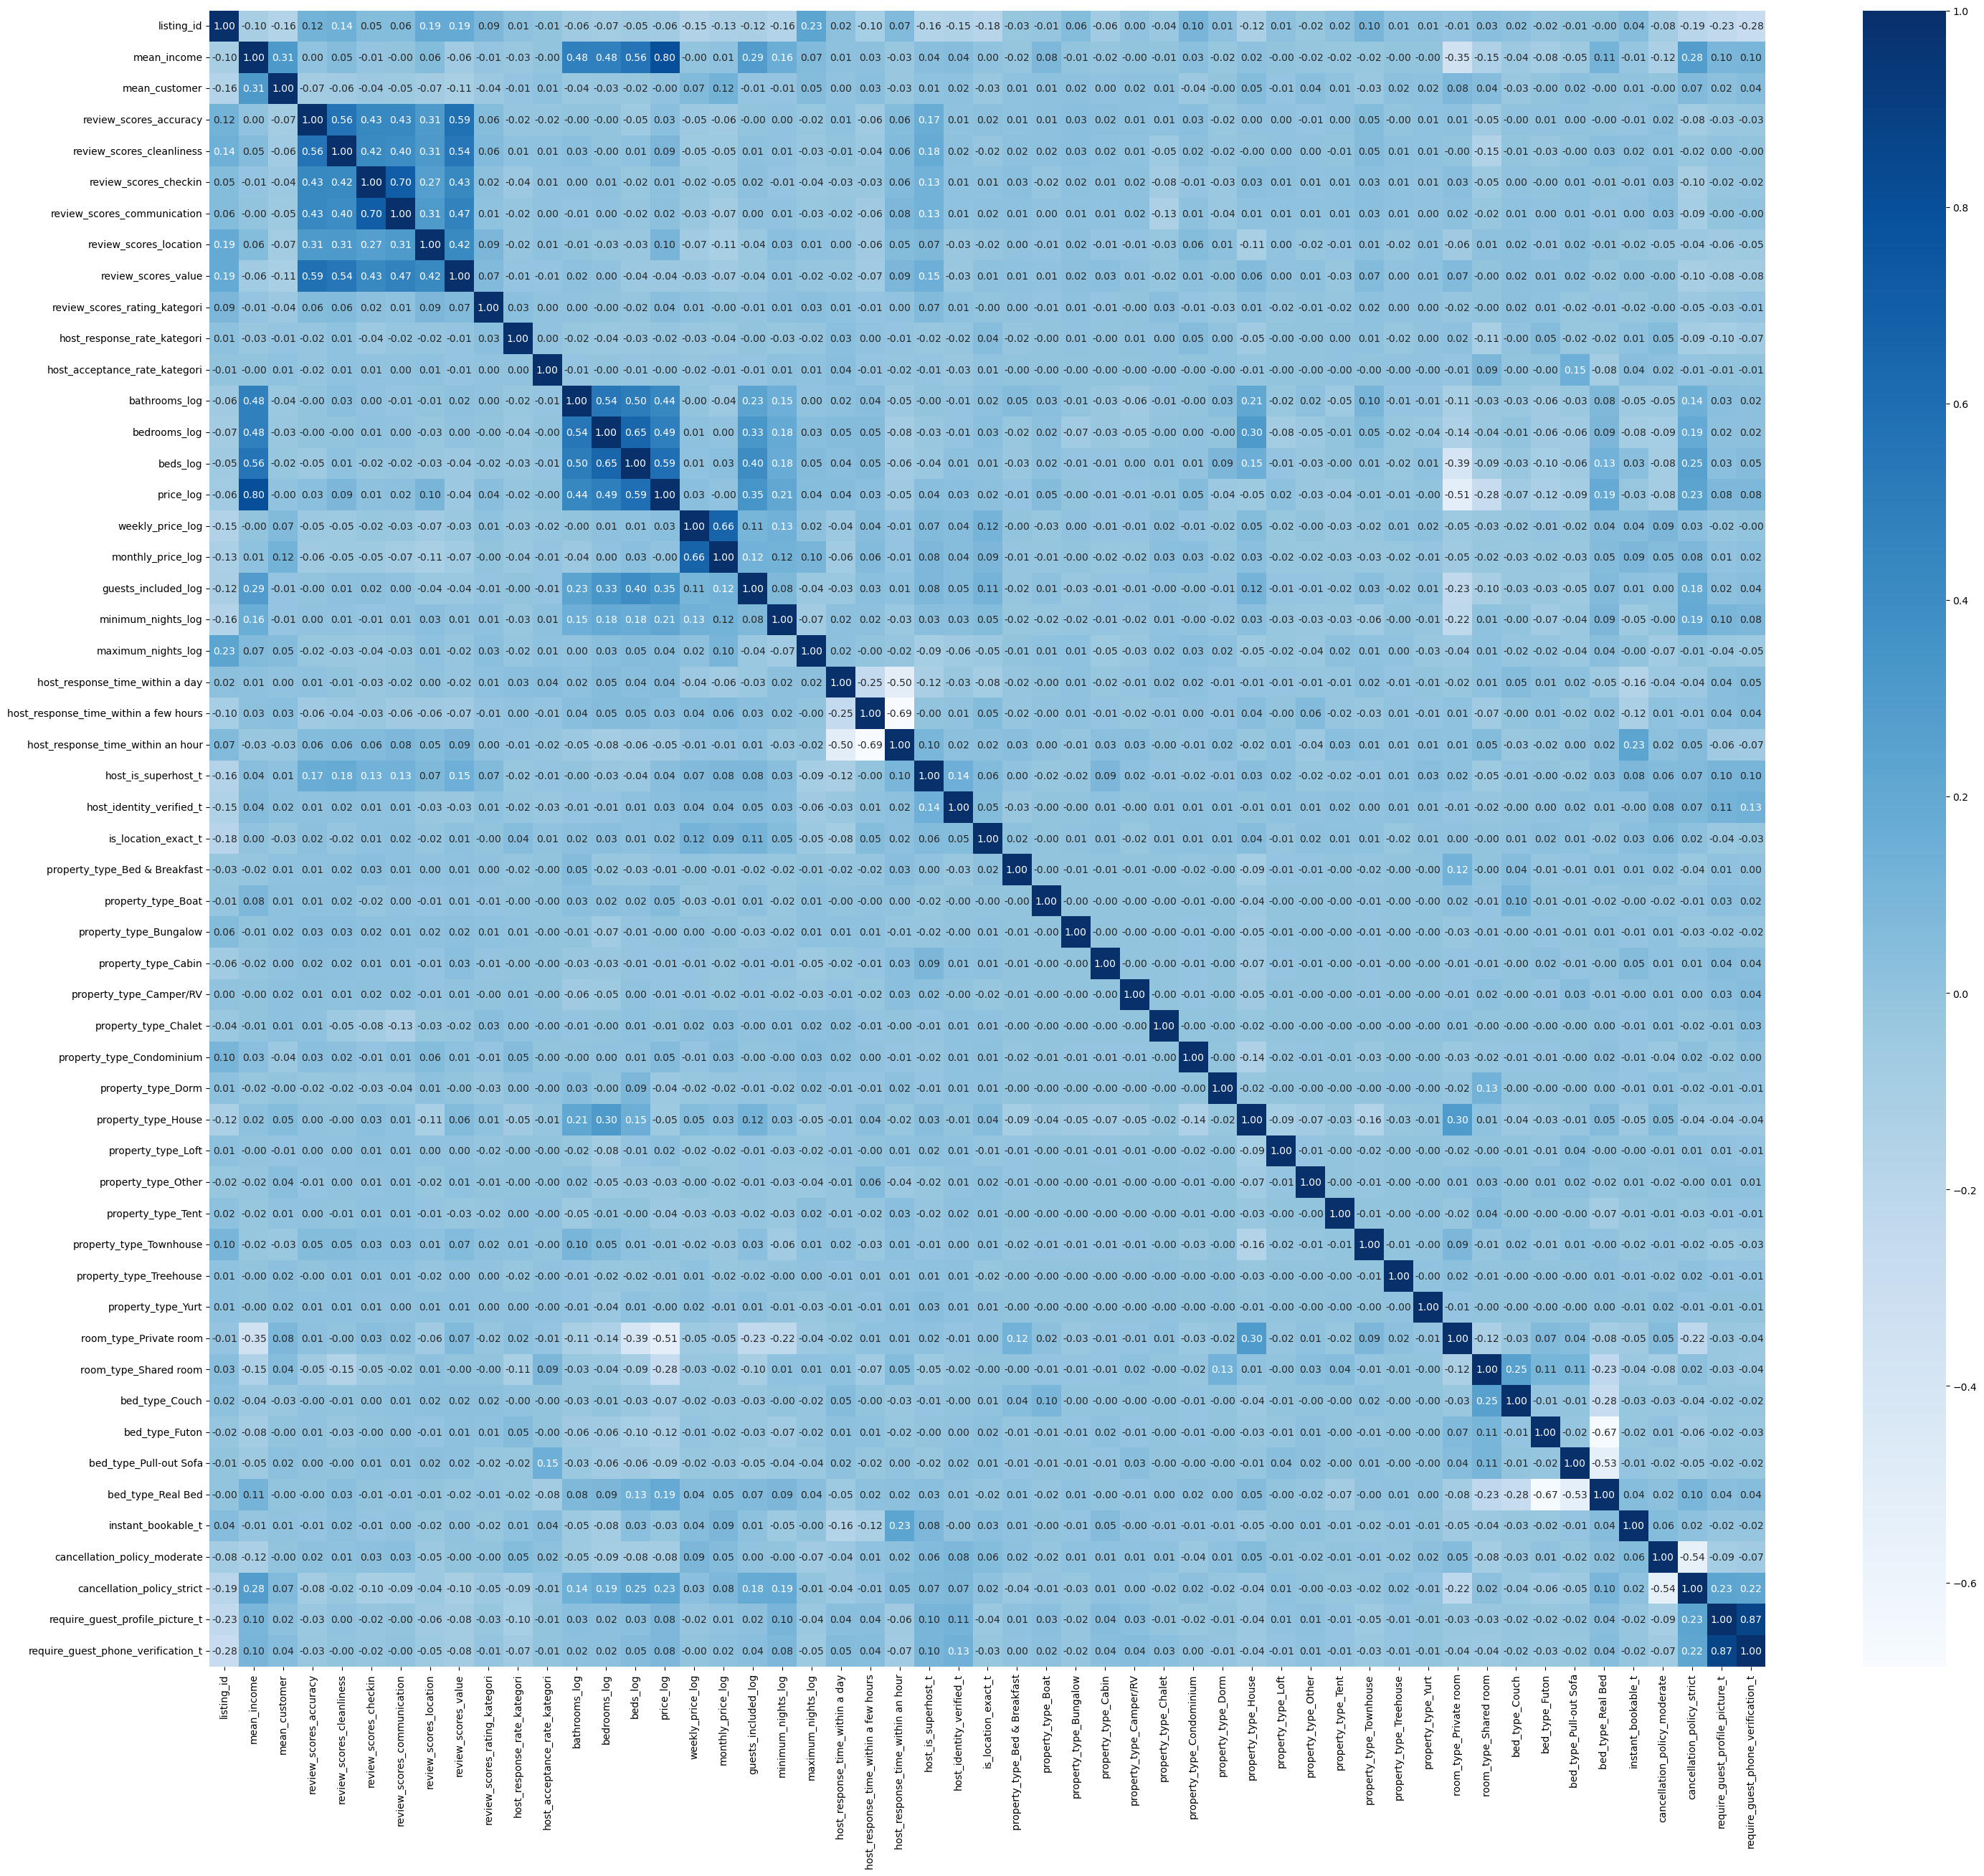

In [241]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [243]:
df2 = df2.drop(columns=['beds_log','review_scores_communication','review_scores_value'])

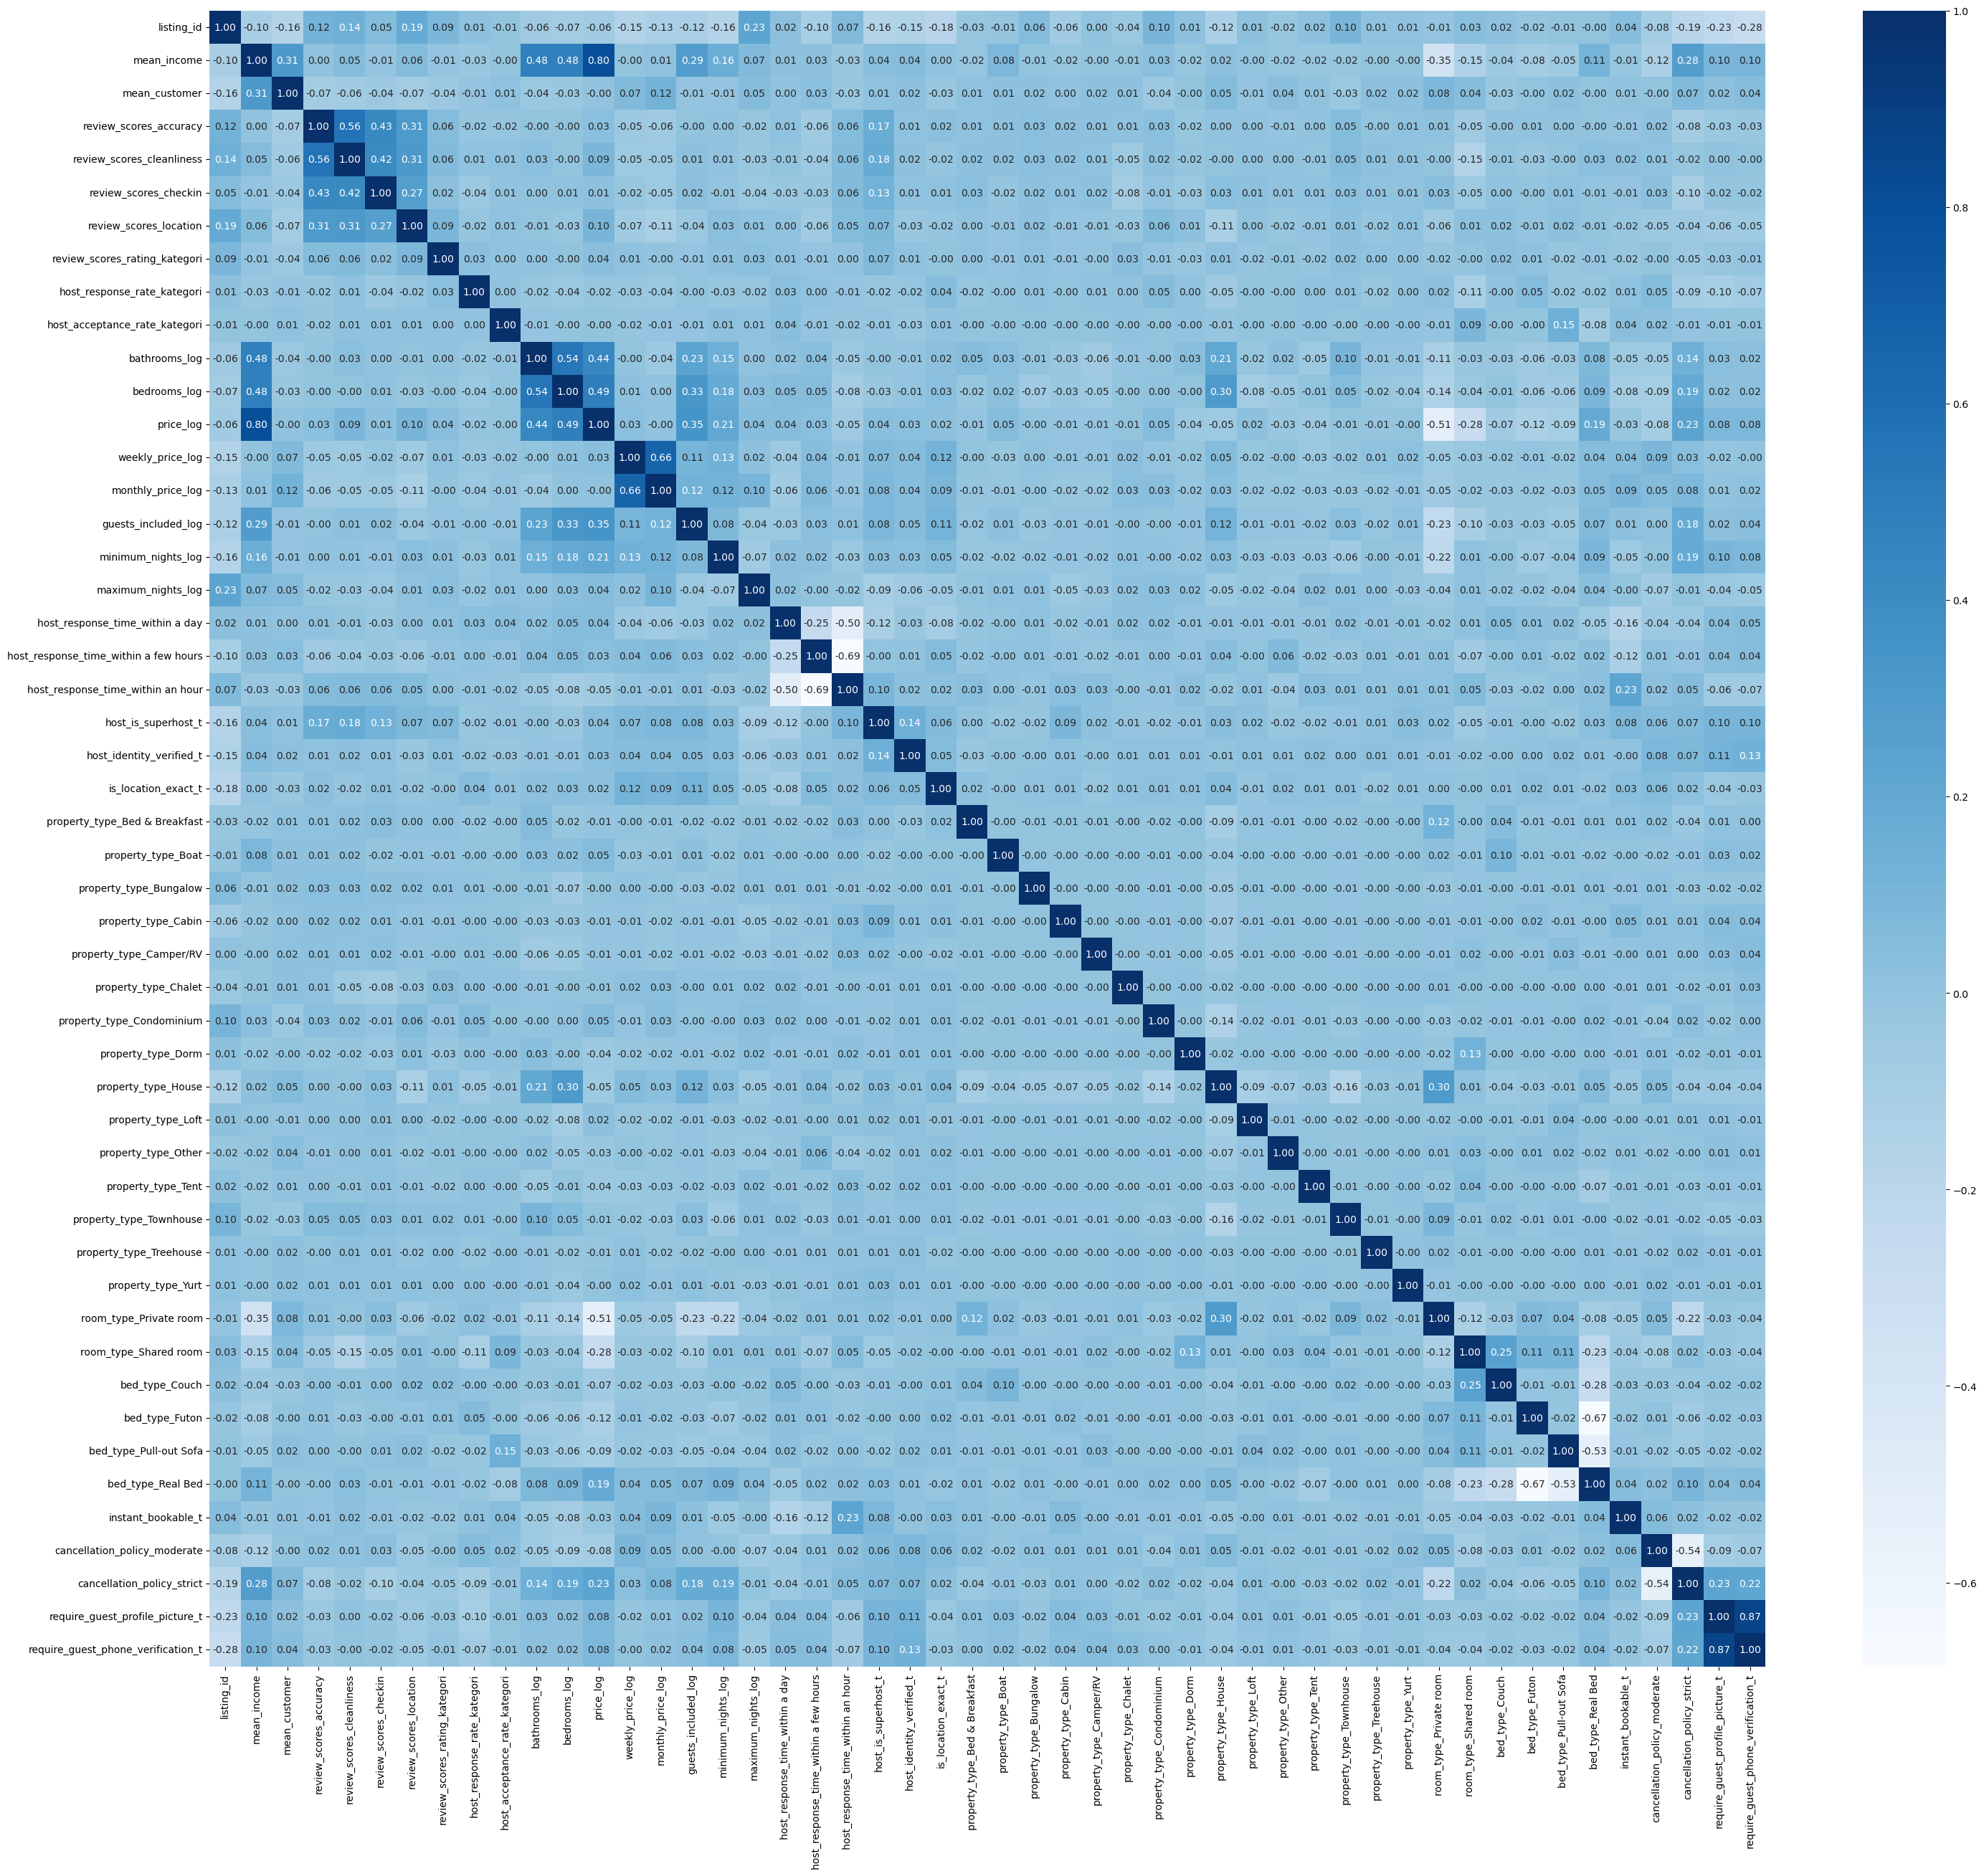

In [245]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [246]:
df2 = df2.drop(columns=['review_scores_cleanliness','bathrooms_log','weekly_price_log','monthly_price_log','require_guest_profile_picture_t'])

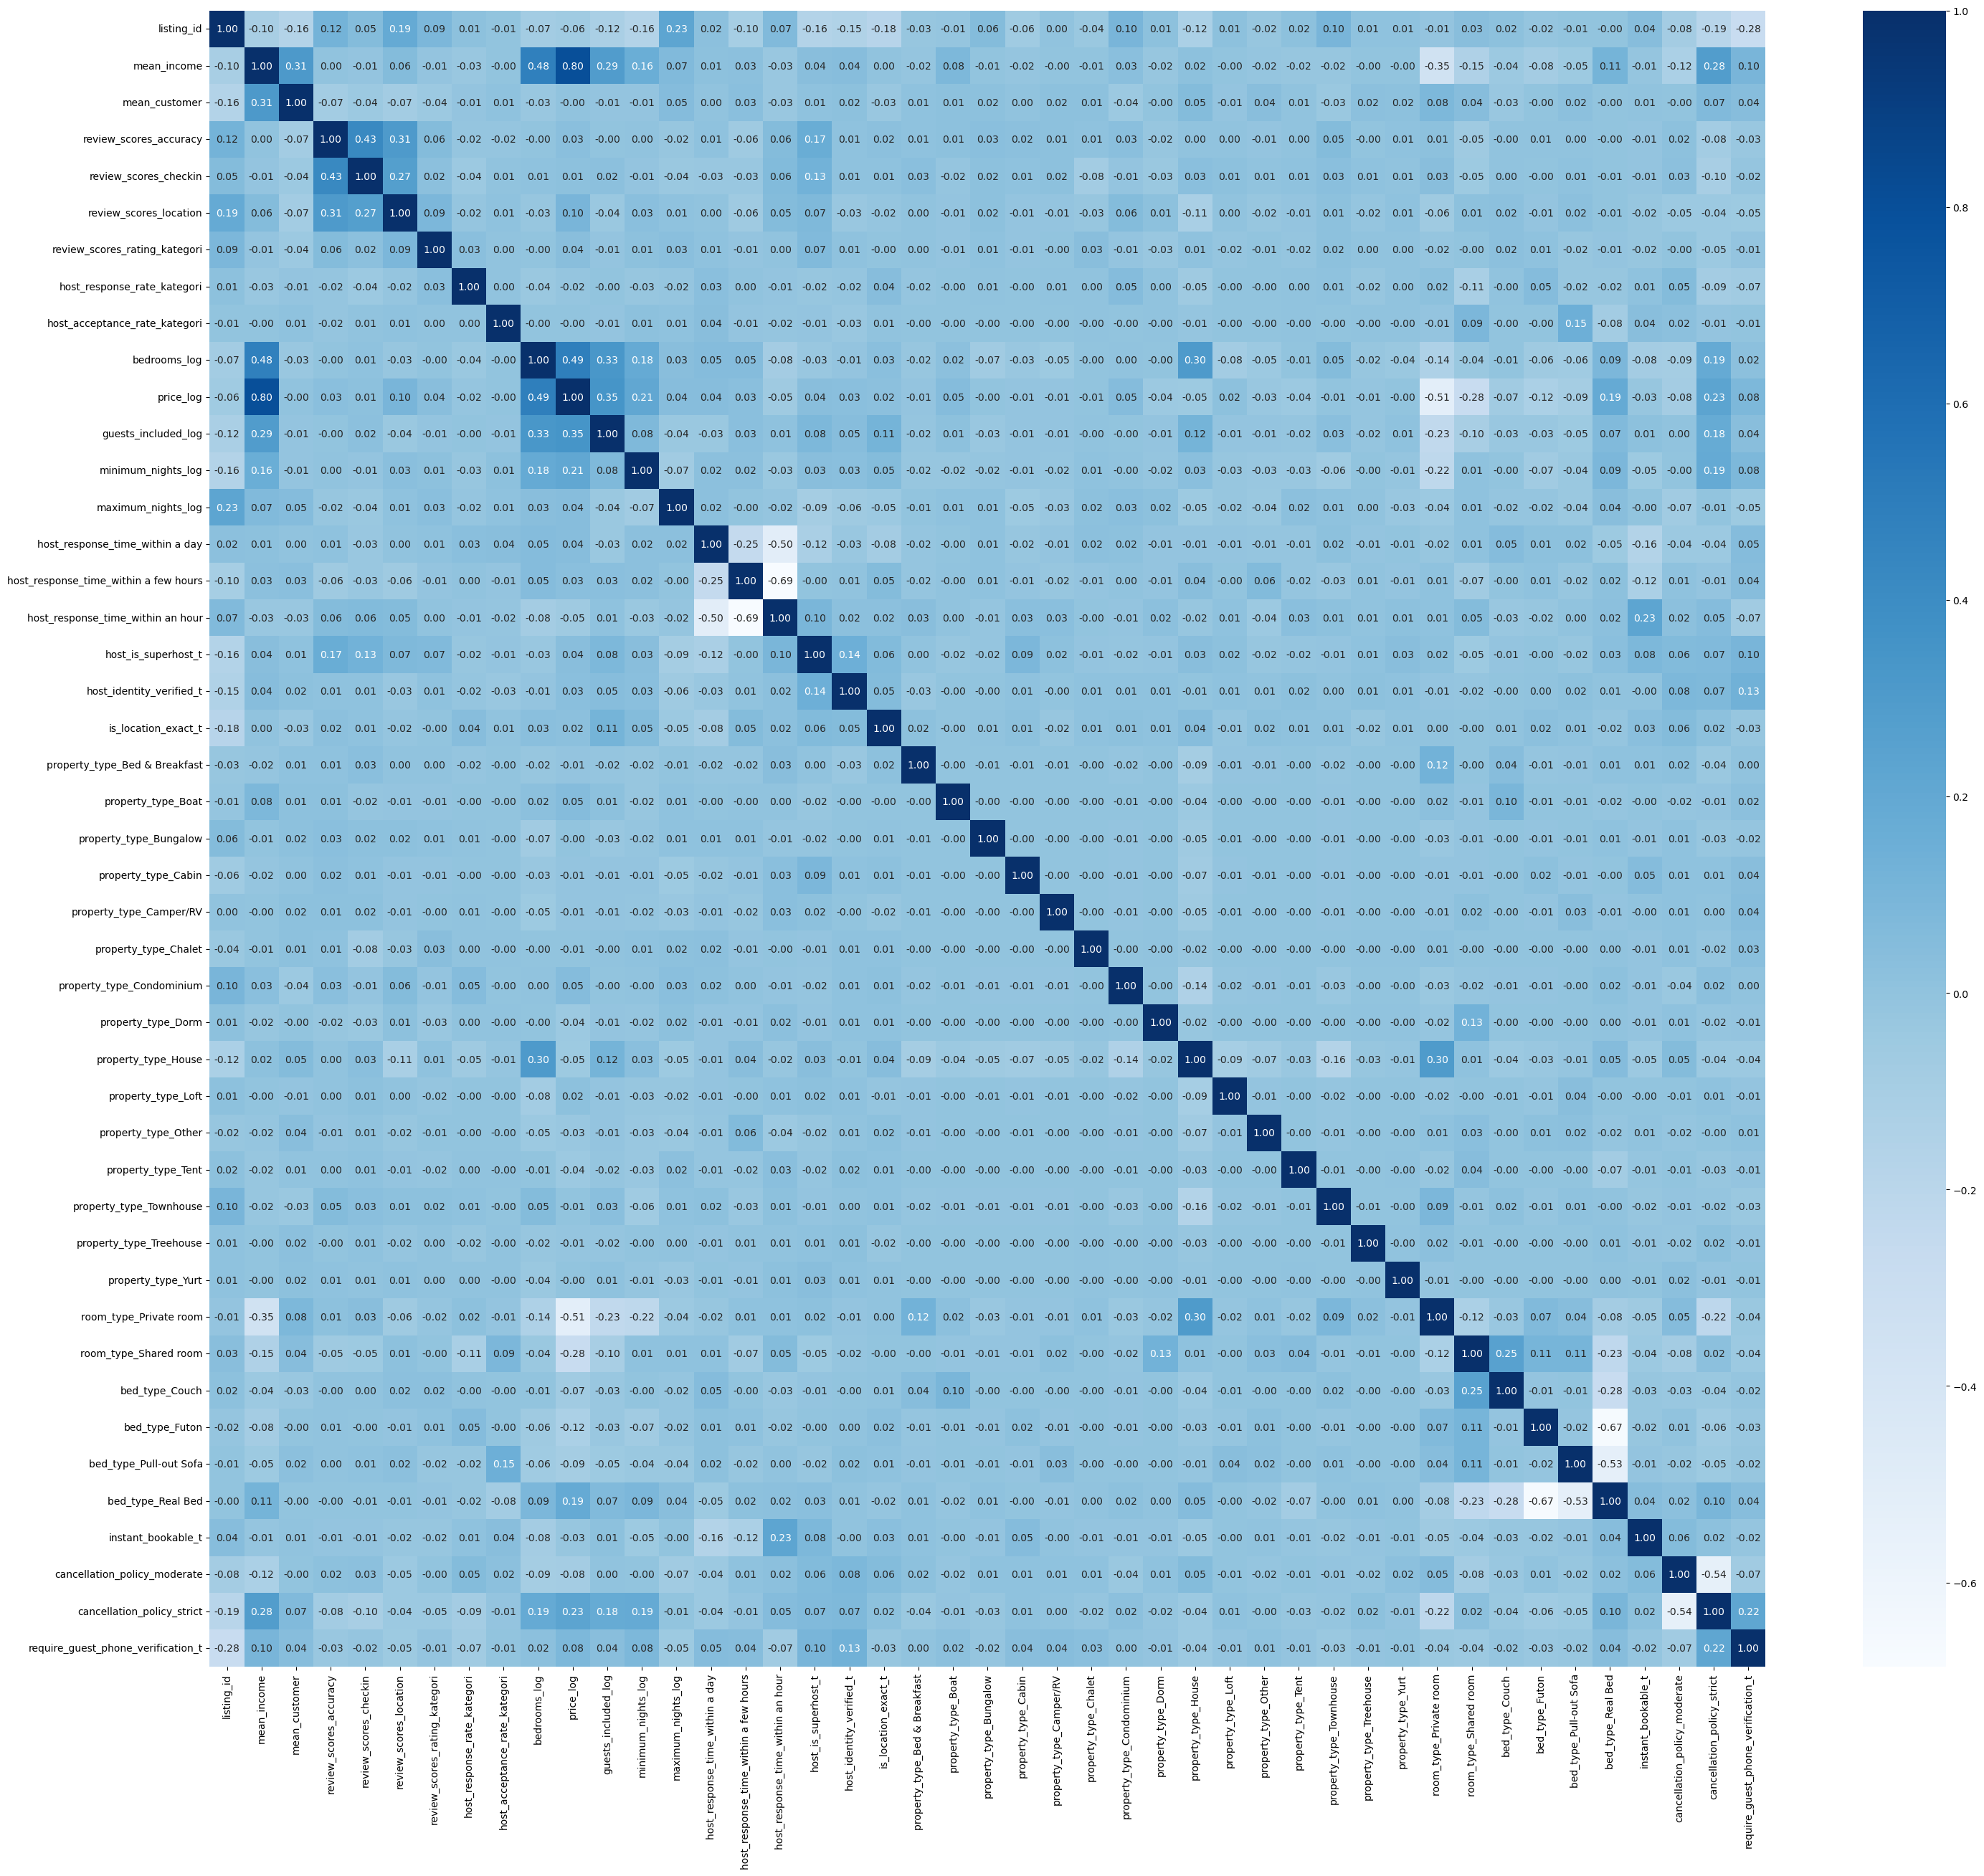

In [247]:
numeric_df = df2.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])
plt.figure(figsize=(35, 30))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [248]:
df2.isna().sum()

listing_id                               0
mean_income                              0
mean_customer                            0
host_id                                  0
zipcode                                  0
latitude                                 0
longitude                                0
review_scores_accuracy                   0
review_scores_checkin                    0
review_scores_location                   0
review_scores_rating_kategori            0
host_response_rate_kategori              0
host_acceptance_rate_kategori            0
bedrooms_log                             0
price_log                                0
guests_included_log                      0
minimum_nights_log                       0
maximum_nights_log                       0
host_response_time_within a day          0
host_response_time_within a few hours    0
host_response_time_within an hour        0
host_is_superhost_t                      0
host_identity_verified_t                 0
is_location

In [249]:
import numpy as np
numeric_df = df2.select_dtypes(include=[np.number])

# Periksa nilai infinity pada kolom numerik
print("\nApakah ada nilai infinity?")
print(np.isinf(numeric_df).any())
# Periksa nilai NaN
print("Jumlah NaN di setiap kolom:")
print(numeric_df.isna().sum())



Apakah ada nilai infinity?
listing_id                       False
mean_income                      False
mean_customer                    False
review_scores_accuracy           False
review_scores_checkin            False
review_scores_location           False
review_scores_rating_kategori    False
host_response_rate_kategori      False
host_acceptance_rate_kategori    False
bedrooms_log                     False
price_log                        False
guests_included_log              False
minimum_nights_log               False
maximum_nights_log               False
dtype: bool
Jumlah NaN di setiap kolom:
listing_id                       0
mean_income                      0
mean_customer                    0
review_scores_accuracy           0
review_scores_checkin            0
review_scores_location           0
review_scores_rating_kategori    0
host_response_rate_kategori      0
host_acceptance_rate_kategori    0
bedrooms_log                     0
price_log                        0
g

# Stage 3

In [256]:
print(numeric_df.columns)

Index(['listing_id', 'mean_income', 'mean_customer', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_location',
       'review_scores_rating_kategori', 'host_response_rate_kategori',
       'host_acceptance_rate_kategori', 'bedrooms_log', 'price_log',
       'guests_included_log', 'minimum_nights_log', 'maximum_nights_log'],
      dtype='object')


In [258]:
numeric_df.drop(columns = ['listing_id'])

mean_income  mean_customer  review_scores_accuracy  \
0     3090.000000      25.750000                    10.0   
1     2302.307692      28.076923                    10.0   
2     1282.230769      23.769231                    10.0   
3     2606.923077      28.076923                     9.0   
4     1126.250000      13.250000                    10.0   
...           ...            ...                     ...   
3718  1225.384615      27.230769                    10.0   
3719  1123.076923      28.076923                    10.0   
3720  3332.307692      27.769231                    10.0   
3721  6679.615385      28.076923                    10.0   
3722  1184.153846      27.538462                    10.0   

      review_scores_checkin  review_scores_location  \
0                      10.0                    10.0   
1                      10.0                     9.0   
2                      10.0                     9.0   
3                      10.0                    10.0   
4                      10.0                    10.0   
...                     ...                     ...   
3718                   10.0                    10.0   
3719                   10.0                    10.0   
3720                   10.0                    10.0   
3721                   10.0                    10.0   
3722                   10.0                    10.0   

      review_scores_rating_kategori  host_response_rate_kategori  \
0                                 2                            0   
1                                 2                            2   
2                                 2                            2   
3                                 2                            0   
4                                 2                            2   
...                             ...                          ...   
3718                              2                            2   
3719                              2                            2   
3720                              2                            2   
3721                              2                            2   
3722                              2                            0   

      host_acceptance_rate_kategori  bedrooms_log  price_log  \
0                                 0      1.098612   4.795791   
1                                 0      0.693147   4.418841   
2                                 0      0.693147   3.891820   
3                                 0      0.693147   4.510860   
4                                 0      0.693147   4.454347   
...                             ...           ...        ...   
3718                              0      0.693147   3.828641   
3719                              0      0.693147   3.713572   
3720                              0      0.693147   4.795791   
3721                              0      1.098612   5.393628   
3722                              0      0.693147   3.784190   

      guests_included_log  minimum_nights_log  maximum_nights_log  
0                1.098612            1.098612            6.594413  
1                0.693147            1.098612            4.110874  
2                0.693147            1.386294            3.367296  
3                1.098612            1.098612            7.026427  
4                0.693147            0.693147            7.026427  
...                   ...                 ...                 ...  
3718             0.693147            2.708050            7.026427  
3719             0.693147            0.693147            7.026427  
3720             0.693147            1.098612            7.026427  
3721             0.693147            1.098612            7.026427  
3722             0.693147            0.693147            7.026427  

[3723 rows x 13 columns]

In [555]:
# Fitur
X = numeric_df[['review_scores_accuracy',
       'review_scores_checkin', 'review_scores_location',
       'review_scores_rating_kategori', 'host_response_rate_kategori',
       'host_acceptance_rate_kategori', 'bedrooms_log', 'price_log',
       'guests_included_log', 'minimum_nights_log', 'maximum_nights_log']]

# Target untuk model 1: mean_income
y_income = numeric_df['mean_income']

# Target untuk model 2: mean_customer
y_customer = numeric_df['mean_customer']

In [262]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## Liniear Regression

In [679]:
from sklearn.linear_model import LinearRegression

In [681]:
# Split sekali untuk X dan kedua target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_income, y_test_income, y_train_customer, y_test_customer = train_test_split(
    X, y_income, y_customer, test_size=0.2, random_state=42)

In [683]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [685]:
# Model Linear Regression untuk mean_income
model_income = LinearRegression()
model_income.fit(X_train_scaled, y_train_income)

# Model Linear Regression untuk mean_customer
model_customer = LinearRegression()
model_customer.fit(X_train_scaled, y_train_customer)

LinearRegression()

In [689]:
# Prediksi untuk mean_income
y_pred_income = model_income.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Mean Income - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

# Prediksi untuk mean_customer
y_pred_customer = model_customer.predict(X_test_scaled)
mse_customer = mean_squared_error(y_test_customer, y_pred_customer)
r2_customer = r2_score(y_test_customer, y_pred_customer)

print(f"Mean Customer - MSE: {mse_customer:.2f}, R²: {r2_customer:.2f}")

Mean Income - MSE: 2532637.65, R²: 0.64
Mean Customer - MSE: 34.12, R²: 0.01


In [691]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediksi untuk mean_income pada data training
y_train_pred_income = model_income.predict(X_train_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_pred_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)

print(f"Mean Income (Train) - MSE: {mse_train_income:.2f}, R²: {r2_train_income:.2f}")

# Prediksi untuk mean_customer pada data training
y_train_pred_customer = model_customer.predict(X_train_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_customer, y_train_pred_customer)

print(f"Mean Customer (Train) - MSE: {mse_train_customer:.2f}, R²: {r2_train_customer:.2f}")

Mean Income (Train) - MSE: 2184274.44, R²: 0.66
Mean Customer (Train) - MSE: 31.07, R²: 0.01


In [693]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Model Linear Regression
linear_model = LinearRegression()

# Scorer untuk RMSE (Root Mean Squared Error)
mse_scorer = make_scorer(mean_squared_error)

# Cross-validation pada data training
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train_income, 
                             cv=5, scoring=mse_scorer)

# Hasil CV
print(f"CV Linear Regression - MSE: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

CV Linear Regression - MSE: 6310593.8745 ± 8102419.2616


In [695]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Tentukan model Ridge Regression (regularisasi L2)
ridge = Ridge()

# Tentukan grid parameter untuk tuning
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Nilai alpha untuk regularisasi L2
}

# Gunakan GridSearchCV untuk pencarian parameter terbaik
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train_scaled, y_train_income)  # Gunakan X_train_scaled dan target yang sesuai

# Cek parameter terbaik
print("Best Parameters (Ridge Regression):", grid_search_ridge.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters (Ridge Regression): {'alpha': 10}


In [697]:
# Model Ridge dengan parameter terbaik
best_ridge = grid_search_ridge.best_estimator_

# Melatih model ulang dengan parameter terbaik
best_ridge.fit(X_train_scaled, y_train_income)

# Prediksi dan evaluasi
y_pred_income = best_ridge.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Best Ridge - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

Best Ridge - MSE: 2534494.87, R²: 0.64


In [705]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Tentukan model Ridge Regression (regularisasi L2)
ridge = Ridge()

# Tentukan grid parameter untuk tuning
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Nilai alpha untuk regularisasi L2
}

# Gunakan GridSearchCV untuk pencarian parameter terbaik
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train_scaled, y_train_customer)  # Gunakan X_train_scaled dan target yang sesuai

# Cek parameter terbaik
print("Best Parameters (Ridge Regression):", grid_search_ridge.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters (Ridge Regression): {'alpha': 100}


In [707]:
# Model Ridge dengan parameter terbaik
best_ridge = grid_search_ridge.best_estimator_

# Melatih model ulang dengan parameter terbaik
best_ridge.fit(X_train_scaled, y_train_customer)

# Prediksi dan evaluasi
y_pred_income = best_ridge.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_customer, y_pred_customer)
r2_income = r2_score(y_test_customer, y_pred_customer)

print(f"Best Ridge - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

Best Ridge - MSE: 34.12, R²: 0.01


In [699]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediksi pada data training
y_train_pred_income = best_ridge.predict(X_train_scaled)

# Evaluasi MSE dan R² pada data training
mse_train_income = mean_squared_error(y_train_income, y_train_pred_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)

print(f"Best Ridge (Train) - MSE: {mse_train_income:.2f}, R²: {r2_train_income:.2f}")


Best Ridge (Train) - MSE: 2184325.61, R²: 0.66


In [701]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Model Ridge dengan parameter terbaik
best_ridge = Ridge(**grid_search_ridge.best_params_, random_state=42)

# Scorer untuk MSE (negatif karena cross_val_score menginginkan metrik "lebih baik lebih tinggi")
mse_scorer = make_scorer(mean_squared_error)

# Cross-validation pada data training
cv_scores = cross_val_score(best_ridge, X_train_scaled, y_train_income, 
                             cv=5, scoring=mse_scorer)

# Hasil CV
print(f"CV Ridge - MSE: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

CV Ridge - MSE: 2199247.6455 ± 161060.2610


In [703]:
import pandas as pd
import numpy as np

# Melatih ulang Ridge Regression dengan parameter terbaik
best_ridge = grid_search_ridge.best_estimator_
best_ridge.fit(X_train_scaled, y_train_income)

# Mendapatkan koefisien
coefficients = best_ridge.coef_

# Mengonversi X_train_scaled menjadi DataFrame jika X_train adalah DataFrame asli
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Menyusun hasil ke dalam DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Coefficient': coefficients
})

# Sort berdasarkan pengaruh terbesar
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                          Feature  Coefficient
7                       price_log  1870.105465
6                    bedrooms_log   335.244148
10             maximum_nights_log    75.662516
5   host_acceptance_rate_kategori    -3.755081
2          review_scores_location    -5.137527
8             guests_included_log   -26.766497
9              minimum_nights_log   -29.738499
0          review_scores_accuracy   -31.049947
4     host_response_rate_kategori   -33.198651
1           review_scores_checkin   -64.882269
3   review_scores_rating_kategori   -68.433683


## Random Forest

In [292]:
from sklearn.ensemble import RandomForestRegressor

# Model untuk mean_income
model_income = RandomForestRegressor(random_state=42)
model_income.fit(X_train_scaled, y_train_income)

# Model untuk mean_customer
model_customer = RandomForestRegressor(random_state=42)
model_customer.fit(X_train_scaled, y_train_customer)

RandomForestRegressor(random_state=42)

In [298]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediksi mean_income
y_pred_income = model_income.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Mean Income - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

# Prediksi mean_customer
y_pred_customer = model_customer.predict(X_test_scaled)
mse_customer = mean_squared_error(y_test_customer, y_pred_customer)
r2_customer = r2_score(y_test_customer, y_pred_customer)

print(f"Mean Customer - MSE: {mse_customer:.2f}, R²: {r2_customer:.2f}")

Mean Income - MSE: 1627928.95, R²: 0.77
Mean Customer - MSE: 38.67, R²: -0.12


In [300]:
# Evaluasi pada data training
# Mean Income
y_train_pred_income = model_income.predict(X_train_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_pred_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)

print(f"Train Mean Income - MSE: {mse_train_income:.2f}, R²: {r2_train_income:.2f}")

# Mean Customer
y_train_pred_customer = model_customer.predict(X_train_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_customer, y_train_pred_customer)

print(f"Train Mean Customer - MSE: {mse_train_customer:.2f}, R²: {r2_train_customer:.2f}")

Train Mean Income - MSE: 307682.62, R²: 0.95
Train Mean Customer - MSE: 8.92, R²: 0.72


In [302]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Model Random Forest default
rf_default = RandomForestRegressor(random_state=42)

# Cross-validation
cv_scores_default = cross_val_score(rf_default, X_train_scaled, y_train_income, 
                                    cv=5, scoring='neg_mean_squared_error')

# Rata-rata dan standar deviasi MSE
mse_default = (-cv_scores_default) ** 0.5  # Negatif diubah ke positif
print(f"CV MSE (Default): {mse_default.mean():.4f} ± {mse_default.std():.4f}")

CV MSE (Default): 1277.7709 ± 56.4796


In [304]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Tentukan model Random Forest
rf = RandomForestRegressor(random_state=42)

# Tentukan grid parameter untuk tuning
param_grid_rf = {
    'n_estimators': [100, 200], 
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Gunakan GridSearchCV untuk pencarian parameter terbaik
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train_income)  # Gunakan X_train_scaled dan target yang sesuai

# Cek parameter terbaik
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters (Random Forest): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [306]:
# Model RandomForest dengan parameter terbaik
best_rf = grid_search_rf.best_estimator_

# Melatih model ulang dengan parameter terbaik
best_rf.fit(X_train_scaled, y_train_income)

# Prediksi dan evaluasi
y_pred_income = best_rf.predict(X_test_scaled)
mse_income = mean_squared_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Best Random Forest - MSE: {mse_income:.2f}, R²: {r2_income:.2f}")

Best Random Forest - MSE: 1870348.60, R²: 0.74


In [308]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediksi pada data training
y_train_pred_income = best_rf.predict(X_train_scaled)

# Evaluasi pada data training
mse_train_income = mean_squared_error(y_train_income, y_train_pred_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)

print(f"Best Random Forest - Train MSE: {mse_train_income:.2f}, Train R²: {r2_train_income:.2f}")

# Evaluasi pada data test
y_test_pred_income = best_rf.predict(X_test_scaled)
mse_test_income = mean_squared_error(y_test_income, y_test_pred_income)
r2_test_income = r2_score(y_test_income, y_test_pred_income)

print(f"Best Random Forest - Test MSE: {mse_test_income:.2f}, Test R²: {r2_test_income:.2f}")

Best Random Forest - Train MSE: 1068434.89, Train R²: 0.83
Best Random Forest - Test MSE: 1870348.60, Test R²: 0.74


In [312]:
# Model Random Forest dengan hyperparameter terbaik
rf_tuned = RandomForestRegressor(random_state=42, **grid_search_rf.best_params_)

# Cross-validation
cv_scores_tuned = cross_val_score(rf_tuned, X_train_scaled, y_train_income, 
                                  cv=5, scoring='neg_mean_squared_error')

# Rata-rata dan standar deviasi RMSE
mse_tuned = (-cv_scores_tuned) ** 0.5
print(f"CV MSE (Tuned): {mse_tuned.mean():.4f} ± {mse_tuned.std():.4f}")

CV MSE (Tuned): 1258.6917 ± 39.3163


In [318]:
# Evaluasi pada data test sudah ada
y_pred_test = best_rf.predict(X_test_scaled)
mse_test = mean_squared_error(y_test_income, y_pred_test)
r2_test = r2_score(y_test_income, y_pred_test)

# Evaluasi pada data training
y_pred_train = best_rf.predict(X_train_scaled)
mse_train = mean_squared_error(y_train_income, y_pred_train)
r2_train = r2_score(y_train_income, y_pred_train)

print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test:.4f}")

Train MSE: 1068434.8949, Train R²: 0.8328
Test MSE: 1870348.6047, Test R²: 0.7363


In [714]:
# Evaluasi pada data test sudah ada
y_pred_test = best_rf.predict(X_test_scaled)
mse_test = mean_squared_error(y_test_customer, y_pred_test)
r2_test = r2_score(y_test_customer, y_pred_test)

# Evaluasi pada data training
y_pred_train = best_rf.predict(X_train_scaled)
mse_train = mean_squared_error(y_train_customer, y_pred_train)
r2_train = r2_score(y_train_customer, y_pred_train)

print(f"Train MSE: {mse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test R²: {r2_test:.4f}")

Train MSE: 14891322.9710, Train R²: -472632.7534
Test MSE: 15094751.2895, Test R²: -437289.1579


In [322]:
# Dapatkan feature importance
feature_importance = best_rf.feature_importances_

# Buat DataFrame untuk visualisasi
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Urutkan berdasarkan kepentingan
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                          Feature  Importance
7                       price_log    0.653285
6                    bedrooms_log    0.197795
8             guests_included_log    0.059664
9              minimum_nights_log    0.029979
10             maximum_nights_log    0.021814
1           review_scores_checkin    0.008915
2          review_scores_location    0.008164
0          review_scores_accuracy    0.008077
4     host_response_rate_kategori    0.006391
3   review_scores_rating_kategori    0.005916
5   host_acceptance_rate_kategori    0.000000


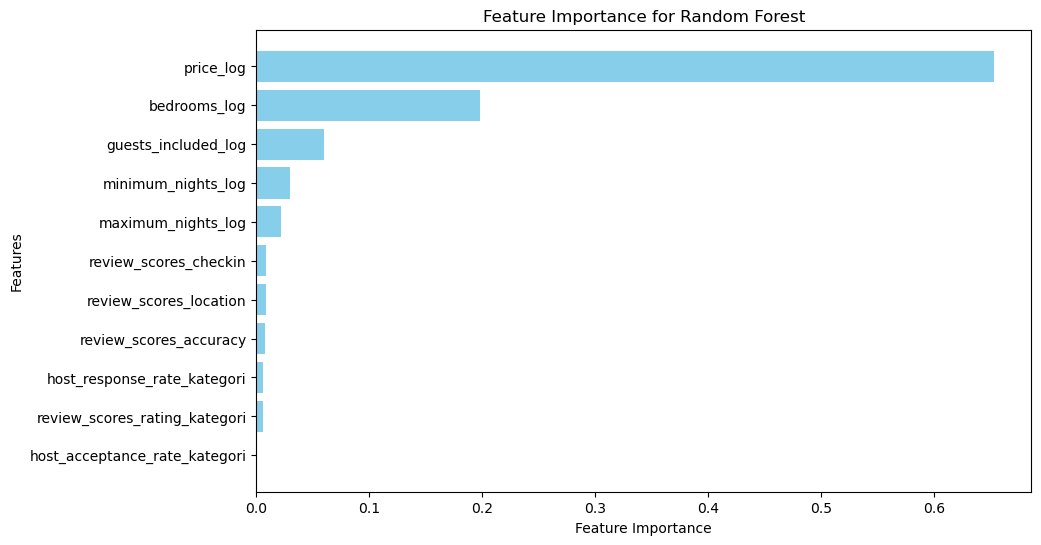

In [324]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Urutkan dari atas ke bawah
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest')
plt.show()

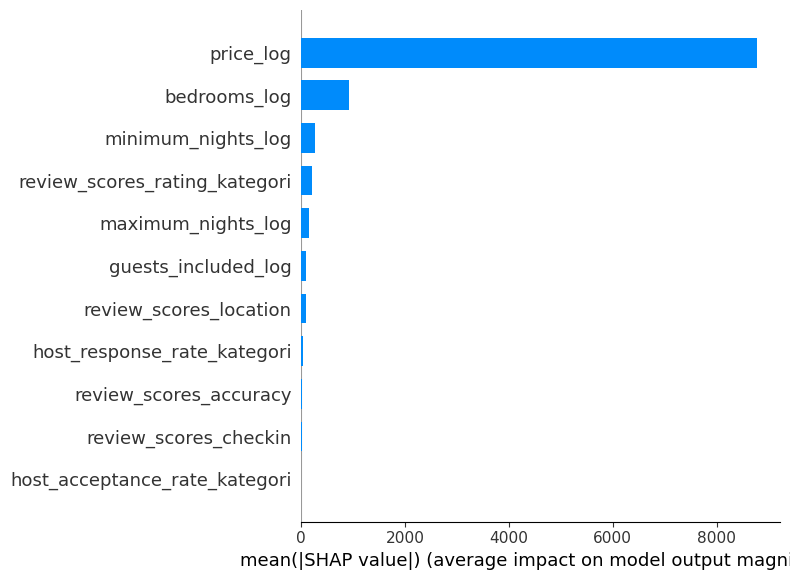

In [326]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Visualisasi
shap.summary_plot(shap_values, X_test, plot_type="bar")

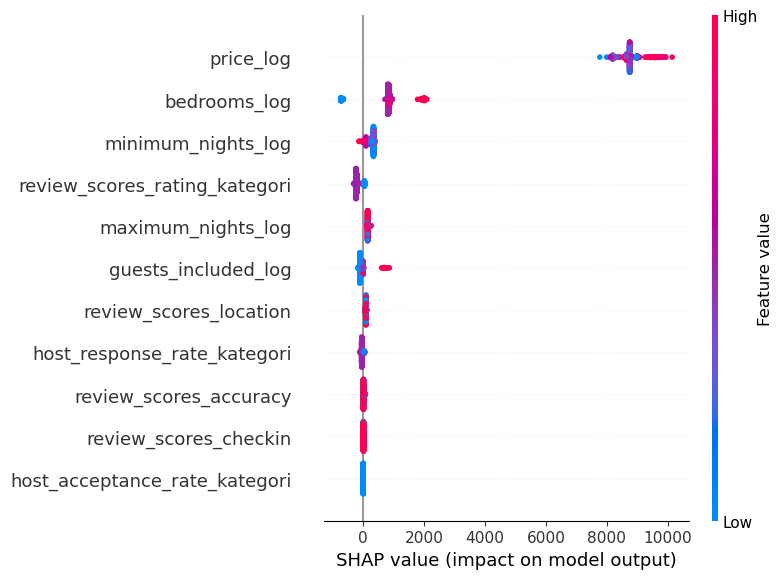

In [328]:
shap.summary_plot(shap_values, X_test)

## SVR (Super Vector Regression)

### SVR Tanpa PCA 

In [561]:
from sklearn.svm import SVR  # Import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Latih model menggunakan SVR dengan data yang sudah direduksi PCA
svr = SVR()
svr.fit(X_train_scaled, y_train_customer)
svr.fit(X_train_scaled, y_train_income)

# Prediksi dan evaluasi pada data latih (training) Mean_Income
y_train_income_pred = svr.predict(X_train_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_income_pred)
r2_train_income = r2_score(y_train_income, y_train_income_pred)

# Prediksi dan evaluasi pada data uji (testing) Mean_Income
y_test_income_pred = svr.predict(X_test_scaled) 
mse_test_income = mean_squared_error(y_test_income, y_test_income_pred)
r2_test_income = r2_score(y_test_income, y_test_income_pred)

# Prediksi dan evaluasi pada data latih (training) Mean_customer
y_train_customer_pred = svr.predict(X_train_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_customer_pred)
r2_train_customer = r2_score(y_train_customer, y_train_customer_pred)

# Prediksi dan evaluasi pada data uji (testing) Mean_customer
y_test_customer_pred = svr.predict(X_test_scaled) 
mse_test_customer = mean_squared_error(y_test_customer, y_test_customer_pred)
r2_test_customer = r2_score(y_test_customer, y_test_customer_pred)

# Tampilkan hasil evaluasi
print("Evaluasi Model SVR (Training Data mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")

print("\nEvaluasi Model SVR (Testing Data mean_income):")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluasi Model SVR (Training Data mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")

print("\nEvaluasi Model SVR (Testing Data mean_custmer):")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")


Evaluasi Model SVR (Training Data mean_income):
MSE (Training): 6502042.9304
R² (Training): -0.0176

Evaluasi Model SVR (Testing Data mean_income):
MSE (Testing): 7250920.2249
R² (Testing): -0.0221

Evaluasi Model SVR (Training Data mean_customer):
MSE (Training): 6683786.9664
R² (Training): -212134.8409

Evaluasi Model SVR (Testing Data mean_custmer):
MSE (Testing): 6684226.1557
R² (Testing): -193638.9120


### Hyperparameter Tunnig tanpa PCA

In [564]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform

# Parameter grid yang lebih kecil
param_distributions = {
    'kernel': ['linear'],
    'C': uniform(1, 11),  # Nilai C antara 1 dan 11
    'epsilon': uniform(0.1, 1),  # Nilai epsilon antara 0.1 dan 1
    'gamma': ['scale', 'auto']
}

# RandomizedSearch untuk mean_income
svr_income = SVR()
random_search_income = RandomizedSearchCV(
    svr_income, 
    param_distributions, 
    n_iter=20,  # Maksimal 20 kombinasi
    scoring='r2', 
    cv=3,  # Menggunakan 3 fold cross-validation
    n_jobs=-1,  # Paralel untuk mempercepat
    random_state=42
)
random_search_income.fit(X_train_scaled, y_train_income)

# Model terbaik untuk mean_income
best_svr_income = random_search_income.best_estimator_
print("Best Parameters for mean_income:", random_search_income.best_params_)

# Evaluasi untuk mean_income
y_train_pred_income = best_svr_income.predict(X_train_scaled)
y_test_pred_income = best_svr_income.predict(X_test_scaled)
mse_train_income = mean_squared_error(y_train_income, y_train_income)
r2_train_income = r2_score(y_train_income, y_train_pred_income)
mse_test_income = mean_squared_error(y_test_income, y_test_pred_income)
r2_test_income = r2_score(y_test_income, y_test_pred_income)

# RandomizedSearch untuk mean_customer
svr_customer = SVR()
random_search_customer = RandomizedSearchCV(
    svr_customer, 
    param_distributions, 
    n_iter=20, 
    scoring='r2', 
    cv=3, 
    n_jobs=-1, 
    random_state=42
)
random_search_customer.fit(X_train_scaled, y_train_customer)

# Model terbaik untuk mean_customer
best_svr_customer = random_search_customer.best_estimator_
print("Best Parameters for mean_customer:", random_search_customer.best_params_)

# Evaluasi untuk mean_customer
y_train_pred_customer = best_svr_customer.predict(X_train_scaled)
y_test_pred_customer = best_svr_customer.predict(X_test_scaled)
mse_train_customer = mean_squared_error(y_train_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_customer, y_train_pred_customer)
mse_test_customer = mean_squared_error(y_test_customer, y_test_pred_customer)
r2_test_customer = r2_score(y_test_customer, y_test_pred_customer)

# Hasil evaluasi
print("\nEvaluasi Model SVR tanpa PCA (mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluasi Model SVR tanpa PCA (mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")

Best Parameters for mean_income: {'C': 11.81553974387467, 'epsilon': 0.5667628932479799, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for mean_customer: {'C': 1.226429437253827, 'epsilon': 1.0699098521619943, 'gamma': 'auto', 'kernel': 'linear'}

Evaluasi Model SVR tanpa PCA (mean_income):
MSE (Training): 0.0000
R² (Training): 0.6192
MSE (Testing): 2849079.6007
R² (Testing): 0.5984

Evaluasi Model SVR tanpa PCA (mean_customer):
MSE (Training): 35.3593
R² (Training): -0.1223
MSE (Testing): 38.7633
R² (Testing): -0.1230


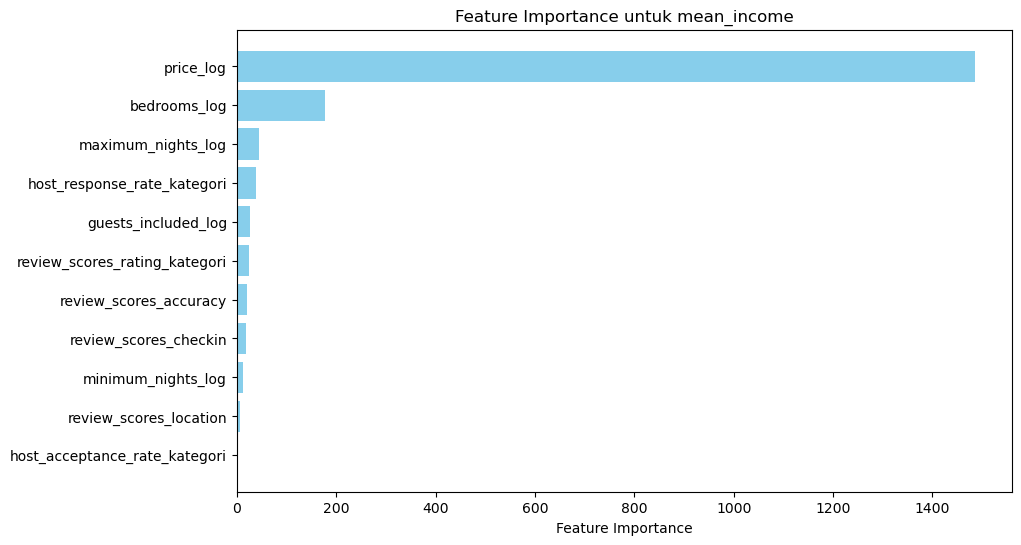

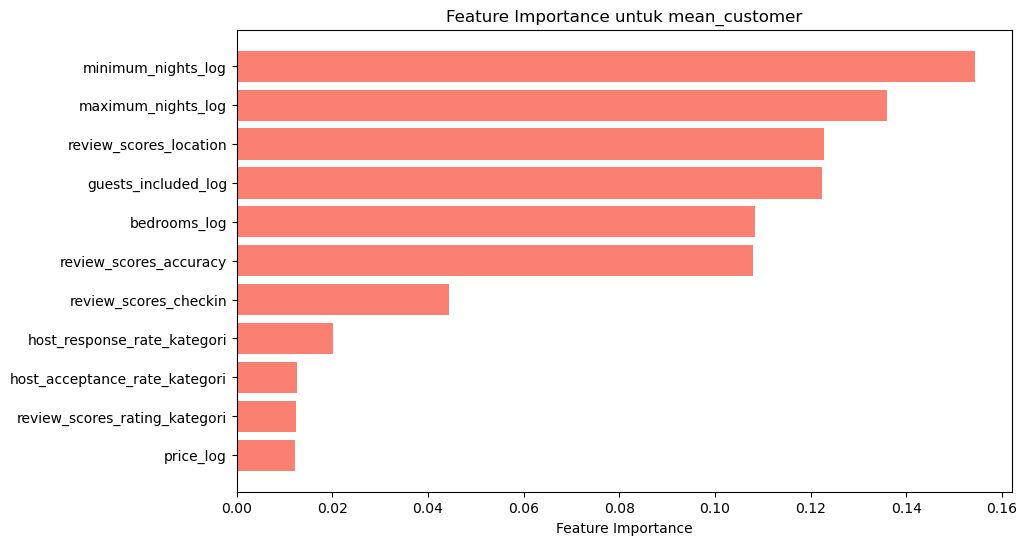

In [566]:
# Konversi kembali menjadi DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)


# Pastikan kernel adalah linear
if best_svr_income.kernel == 'linear':
    coef_income = best_svr_income.coef_.flatten()
    feature_importance_income = pd.DataFrame({
        'Feature': X_train_scaled_df.columns,
        'Importance': np.abs(coef_income)
    }).sort_values(by='Importance', ascending=True)

    # Visualisasikan dengan bar horizontal
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_income['Feature'], feature_importance_income['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance untuk mean_income')
    plt.show()

# Customer
if best_svr_customer.kernel == 'linear':
    coef_customer = best_svr_customer.coef_.flatten()
    feature_importance_customer = pd.DataFrame({
        'Feature': X_train_scaled_df.columns,
        'Importance': np.abs(coef_customer)
    }).sort_values(by='Importance', ascending=True)

    # Visualisasikan dengan bar horizontal
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_customer['Feature'], feature_importance_customer['Importance'], color='salmon')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance untuk mean_customer')
    plt.show()

### Pake PCA

Explained Variance by Components: [0.18125616 0.12804772 0.09137495 0.08093276 0.07284707]


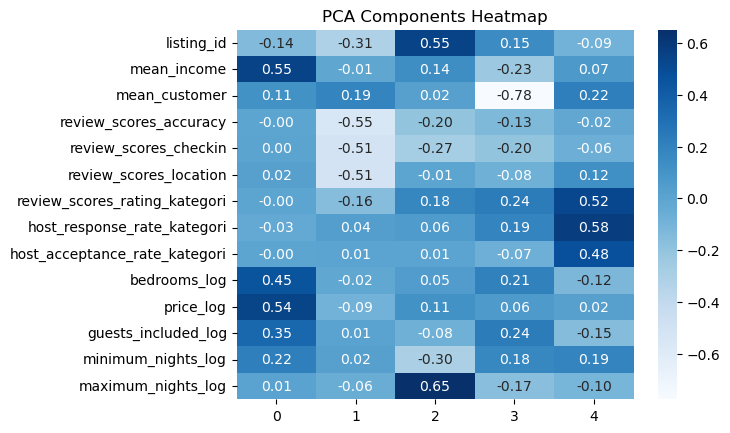

In [594]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standarisasi data numerik
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Lakukan PCA
pca = PCA(n_components=5)  # Misalnya pilih 10 komponen utama
pca_data = pca.fit_transform(scaled_data)

# Tampilkan varians yang dijelaskan oleh setiap komponen
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Components: {explained_variance}")

# Korelasi dari komponen utama
pca_corr_matrix = pd.DataFrame(pca.components_, columns=numeric_df.columns).T
sns.heatmap(pca_corr_matrix, cmap="Blues", annot=True, fmt='.2f')
plt.title("PCA Components Heatmap")
plt.show()

In [596]:
print(pca.components_.shape)

(5, 14)


In [598]:
print(X_train.shape)  # Harusnya (2978, 11)

(2978, 11)


In [600]:
from sklearn.model_selection import train_test_split
X_pca = pca_data  # Data yang sudah direduksi dengan PCA
y_pca_income = numeric_df['mean_income']  # Kolom target yang ingin diprediksi
y_pca_customer =  numeric_df['mean_customer'] 

# Split data untuk y_pca_income
X_train_pca, X_test_pca, y_train_pca_income, y_test_pca_income = train_test_split(
    X_pca, y_pca_income, test_size=0.2, random_state=42
)

# Split data untuk y_pca_customer
_, _, y_train_pca_customer, y_test_pca_customer = train_test_split(
    X_pca, y_pca_customer, test_size=0.2, random_state=42
)

In [602]:
from sklearn.svm import SVR  # Import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Model untuk mean_income
svr_income = SVR()
svr_income.fit(X_train_pca, y_train_pca_income)

# Prediksi dan evaluasi pada data latih (training) untuk mean_income
y_train_pred_income = svr_income.predict(X_train_pca)
mse_train_income = mean_squared_error(y_train_pca_income, y_train_pred_income)
r2_train_income = r2_score(y_train_pca_income, y_train_pred_income)

# Prediksi dan evaluasi pada data uji (testing) untuk mean_income
y_test_pred_income = svr_income.predict(X_test_pca)
mse_test_income = mean_squared_error(y_test_pca_income, y_test_pred_income)
r2_test_income = r2_score(y_test_pca_income, y_test_pred_income)

# Model untuk mean_customer
svr_customer = SVR()
svr_customer.fit(X_train_pca, y_train_pca_customer)

# Prediksi dan evaluasi pada data latih (training) untuk mean_customer
y_train_pred_customer = svr_customer.predict(X_train_pca)
mse_train_customer = mean_squared_error(y_train_pca_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_pca_customer, y_train_pred_customer)

# Prediksi dan evaluasi pada data uji (testing) untuk mean_customer
y_test_pred_customer = svr_customer.predict(X_test_pca)
mse_test_customer = mean_squared_error(y_test_pca_customer, y_test_pred_customer)
r2_test_customer = r2_score(y_test_pca_customer, y_test_pred_customer)

# Tampilkan hasil evaluasi
print("Evaluasi Model SVR dengan PCA (mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluasi Model SVR dengan PCA (mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")

Evaluasi Model SVR dengan PCA (mean_income):
MSE (Training): 6224812.3149
R² (Training): 0.0258
MSE (Testing): 7008122.3005
R² (Testing): 0.0121

Evaluasi Model SVR dengan PCA (mean_customer):
MSE (Training): 3.3437
R² (Training): 0.8939
MSE (Testing): 4.0194
R² (Testing): 0.8836


### Hyperparameter tunning SVR dengan PCA

In [605]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import uniform

# Parameter grid yang lebih kecil
param_distributions = {
    'kernel': ['linear'],
    'C': uniform(1, 11),  # Nilai C antara 1 dan 11
    'epsilon': uniform(0.1, 1),  # Nilai epsilon antara 0.1 dan 1
    'gamma': ['scale', 'auto']
}

# RandomizedSearch untuk mean_income
svr_income = SVR()
random_search_income = RandomizedSearchCV(
    svr_income, 
    param_distributions, 
    n_iter=20,  # Maksimal 20 kombinasi
    scoring='r2', 
    cv=3,  # Menggunakan 3 fold cross-validation
    n_jobs=-1,  # Paralel untuk mempercepat
    random_state=42
)
random_search_income.fit(X_train_pca, y_train_pca_income)

# Model terbaik untuk mean_income
best_svr_income = random_search_income.best_estimator_
print("Best Parameters for mean_income:", random_search_income.best_params_)

# Evaluasi untuk mean_income
y_train_pred_income = best_svr_income.predict(X_train_pca)
y_test_pred_income = best_svr_income.predict(X_test_pca)
mse_train_income = mean_squared_error(y_train_pca_income, y_train_pred_income)
r2_train_income = r2_score(y_train_pca_income, y_train_pred_income)
mse_test_income = mean_squared_error(y_test_pca_income, y_test_pred_income)
r2_test_income = r2_score(y_test_pca_income, y_test_pred_income)

# RandomizedSearch untuk mean_customer
svr_customer = SVR()
random_search_customer = RandomizedSearchCV(
    svr_customer, 
    param_distributions, 
    n_iter=20, 
    scoring='r2', 
    cv=3, 
    n_jobs=-1, 
    random_state=42
)
random_search_customer.fit(X_train_pca, y_train_pca_customer)

# Model terbaik untuk mean_customer
best_svr_customer = random_search_customer.best_estimator_
print("Best Parameters for mean_customer:", random_search_customer.best_params_)

# Evaluasi untuk mean_customer
y_train_pred_customer = best_svr_customer.predict(X_train_pca)
y_test_pred_customer = best_svr_customer.predict(X_test_pca)
mse_train_customer = mean_squared_error(y_train_pca_customer, y_train_pred_customer)
r2_train_customer = r2_score(y_train_pca_customer, y_train_pred_customer)
mse_test_customer = mean_squared_error(y_test_pca_customer, y_test_pred_customer)
r2_test_customer = r2_score(y_test_pca_customer, y_test_pred_customer)

# Hasil evaluasi
print("\nEvaluasi Model SVR dengan PCA (mean_income):")
print(f"MSE (Training): {mse_train_income:.4f}")
print(f"R² (Training): {r2_train_income:.4f}")
print(f"MSE (Testing): {mse_test_income:.4f}")
print(f"R² (Testing): {r2_test_income:.4f}")

print("\nEvaluasi Model SVR dengan PCA (mean_customer):")
print(f"MSE (Training): {mse_train_customer:.4f}")
print(f"R² (Training): {r2_train_customer:.4f}")
print(f"MSE (Testing): {mse_test_customer:.4f}")
print(f"R² (Testing): {r2_test_customer:.4f}")

Best Parameters for mean_income: {'C': 11.81553974387467, 'epsilon': 0.5667628932479799, 'gamma': 'scale', 'kernel': 'linear'}
Best Parameters for mean_customer: {'C': 9.576601003000462, 'epsilon': 0.696850157946487, 'gamma': 'auto', 'kernel': 'linear'}

Evaluasi Model SVR dengan PCA (mean_income):
MSE (Training): 1113254.0475
R² (Training): 0.8258
MSE (Testing): 1234142.4142
R² (Testing): 0.8260

Evaluasi Model SVR dengan PCA (mean_customer):
MSE (Training): 6.0575
R² (Training): 0.8077
MSE (Testing): 4.3432
R² (Testing): 0.8742


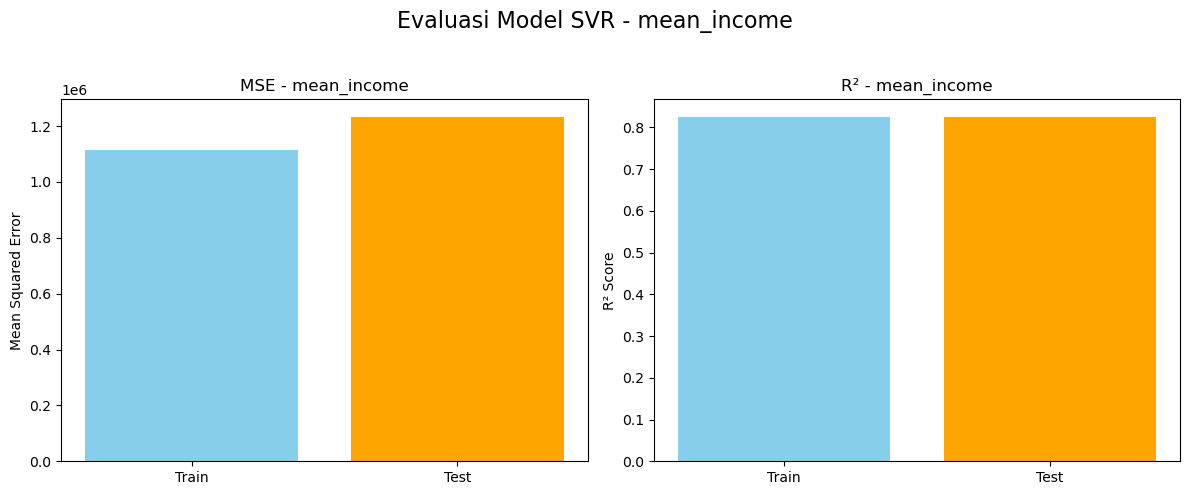

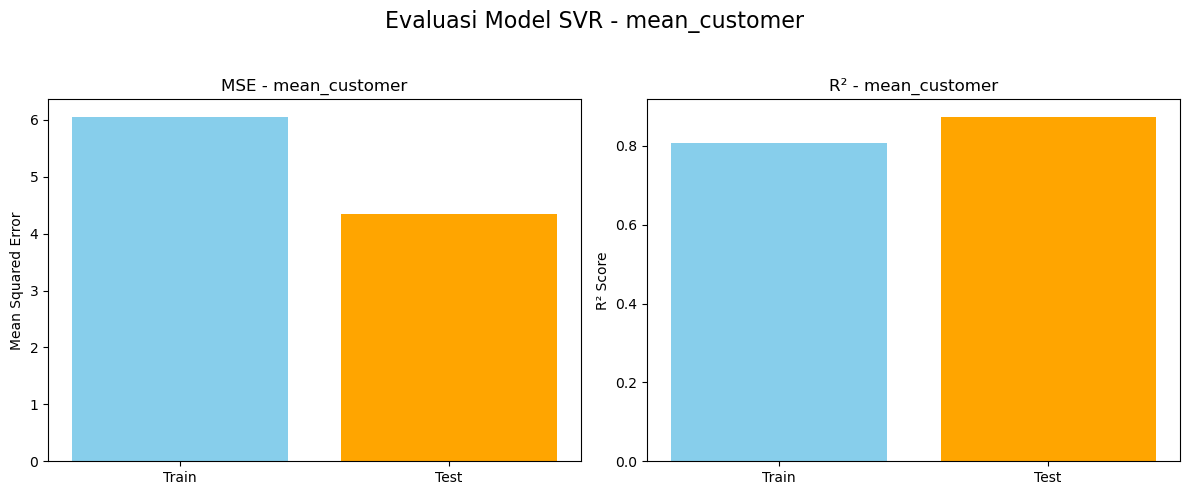

In [607]:
 import matplotlib.pyplot as plt
import numpy as np

# Data untuk grafik
metrics_income = {
    'Train': [mse_train_income, r2_train_income],
    'Test': [mse_test_income, r2_test_income]
}
metrics_customer = {
    'Train': [mse_train_customer, r2_train_customer],
    'Test': [mse_test_customer, r2_test_customer]
}

# Membuat grafik untuk mean_income
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Mean_income
axs[0].bar(
    ['Train', 'Test'], 
    [metrics_income['Train'][0], metrics_income['Test'][0]], 
    color=['skyblue', 'orange']
)
axs[0].set_title('MSE - mean_income')
axs[0].set_ylabel('Mean Squared Error')

axs[1].bar(
    ['Train', 'Test'], 
    [metrics_income['Train'][1], metrics_income['Test'][1]], 
    color=['skyblue', 'orange']
)
axs[1].set_title('R² - mean_income')
axs[1].set_ylabel('R² Score')

plt.suptitle('Evaluasi Model SVR - mean_income', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Membuat grafik untuk mean_customer
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Mean_customer
axs[0].bar(
    ['Train', 'Test'], 
    [metrics_customer['Train'][0], metrics_customer['Test'][0]], 
    color=['skyblue', 'orange']
)
axs[0].set_title('MSE - mean_customer')
axs[0].set_ylabel('Mean Squared Error')

axs[1].bar(
    ['Train', 'Test'], 
    [metrics_customer['Train'][1], metrics_customer['Test'][1]], 
    color=['skyblue', 'orange']
)
axs[1].set_title('R² - mean_customer')
axs[1].set_ylabel('R² Score')

plt.suptitle('Evaluasi Model SVR - mean_customer', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [609]:
# Koefisien dari model SVR untuk mean_income
if best_svr_income.kernel == 'linear':
    coef_income = best_svr_income.coef_.flatten()
    print("Koefisien PC untuk mean_income:", coef_income)

# Koefisien dari model SVR untuk mean_customer
if best_svr_customer.kernel == 'linear':
    coef_customer = best_svr_customer.coef_.flatten()
    print("Koefisien PC untuk mean_customer:", coef_customer)

Koefisien PC untuk mean_income: [1202.20233319  -15.33536497  247.23387155 -455.76967123  167.24475411]
Koefisien PC untuk mean_customer: [ 0.64955769  0.99321618  0.12688633 -4.42726563  1.73550808]


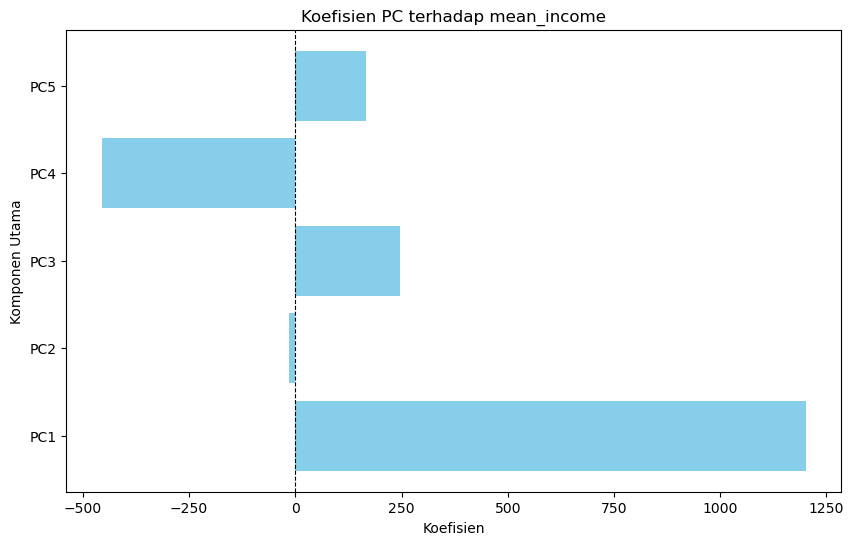

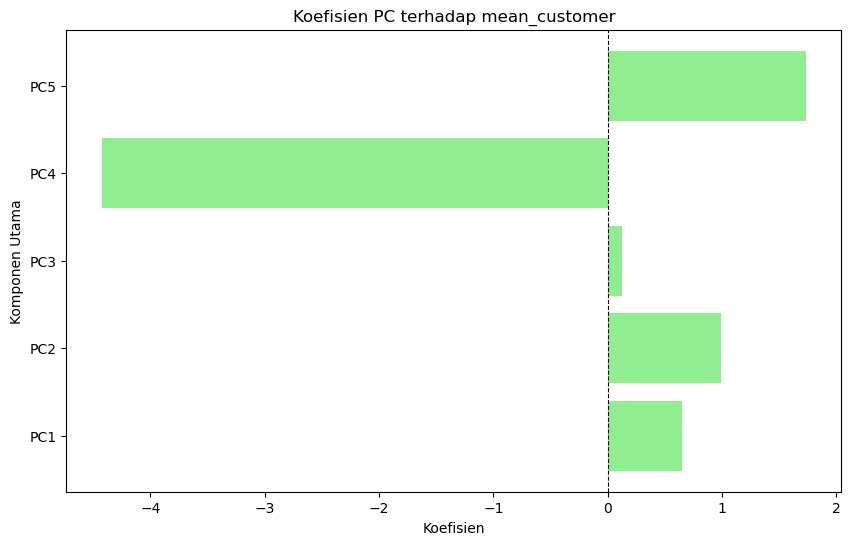

In [611]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame untuk mean_income
pc_importance_income = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(coef_income))],
    'Coefficient': coef_income
})

# Visualisasi untuk mean_income
plt.figure(figsize=(10, 6))
plt.barh(pc_importance_income['PC'], pc_importance_income['Coefficient'], color='skyblue')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Koefisien PC terhadap mean_income')
plt.xlabel('Koefisien')
plt.ylabel('Komponen Utama')
plt.show()

# Buat DataFrame untuk mean_customer
pc_importance_customer = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(coef_customer))],
    'Coefficient': coef_customer
})

# Visualisasi untuk mean_customer
plt.figure(figsize=(10, 6))
plt.barh(pc_importance_customer['PC'], pc_importance_customer['Coefficient'], color='lightgreen')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Koefisien PC terhadap mean_customer')
plt.xlabel('Koefisien')
plt.ylabel('Komponen Utama')
plt.show()

In [655]:
# Membuat loading matrix dengan 5 PCs
loading_matrix = pd.DataFrame(
    pca.components_[:5],  # Ambil hanya 5 PCs
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(5)]  # Hanya sampai 5 PCs
)

# Menampilkan loading matrix
print("Loading Matrix (PC ke Fitur Asli):")
print(loading_matrix)

Loading Matrix (PC ke Fitur Asli):
     review_scores_accuracy  review_scores_checkin  review_scores_location  \
PC1                0.016331               0.016360               -0.001927   
PC2               -0.541372              -0.353561               -0.398660   
PC3               -0.126248              -0.042677               -0.104846   
PC4               -0.497072              -0.302710               -0.224494   
PC5               -0.131379              -0.094144                0.051216   

     review_scores_rating_kategori  host_response_rate_kategori  \
PC1                      -0.014259                     0.004149   
PC2                      -0.460905                     0.439576   
PC3                      -0.522799                    -0.835208   
PC4                       0.709543                    -0.325062   
PC5                      -0.050610                     0.044258   

     host_acceptance_rate_kategori  bedrooms_log  price_log  \
PC1                      -0.00

In [657]:
# Ambil loading matrix dari PCA
loading_matrix = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,  # Nama fitur asli
    index=[f'PC{i+1}' for i in range(pca.n_components_)]  # Nama PC
)

In [659]:
# Loading matrix untuk PC1 dan PC5
pc1_loadings = loading_matrix.loc['PC1']
pc5_loadings = loading_matrix.loc['PC5']

In [661]:
# DataFrame kontribusi fitur asli di PC1
pc1_features = pd.DataFrame({
    'Feature': pc1_loadings.index,
    'Contribution': pc1_loadings.values
}).sort_values(by='Contribution', ascending=False)

In [663]:
# DataFrame kontribusi fitur asli di PC5
pc5_features = pd.DataFrame({
    'Feature': pc5_loadings.index,
    'Contribution': pc5_loadings.values
}).sort_values(by='Contribution', ascending=False)

In [748]:
# DataFrame kontribusi fitur asli di PC4
pc4_loadings = loading_matrix.loc['PC4']
pc4_features = pd.DataFrame({
    'Feature': pc4_loadings.index,
    'Contribution': pc4_loadings.values
}).sort_values(by='Contribution', ascending=False)

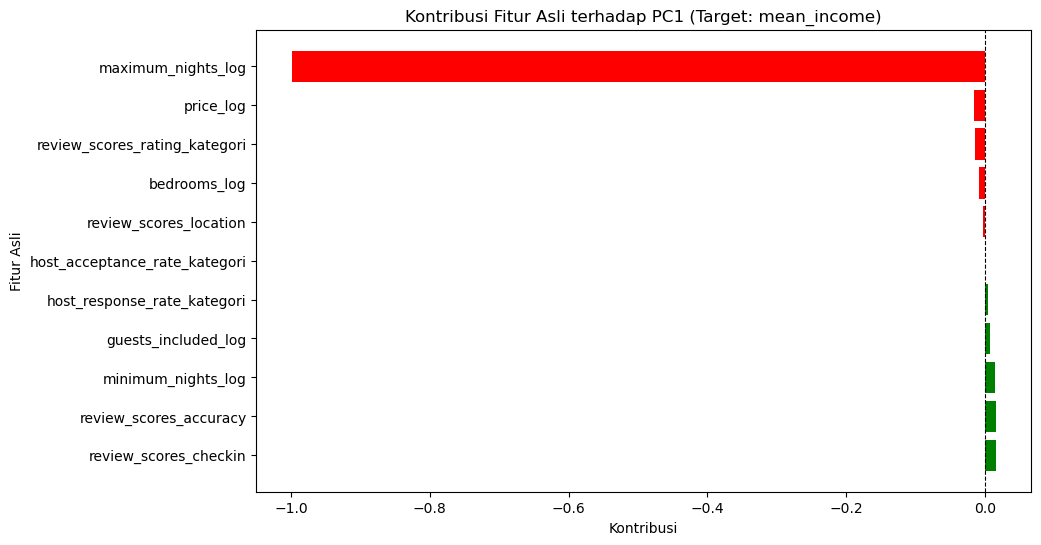

In [665]:
import matplotlib.pyplot as plt

# Visualisasi kontribusi fitur di PC1
plt.figure(figsize=(10, 6))
plt.barh(pc1_features['Feature'], pc1_features['Contribution'], color=pc1_features['Contribution'].apply(lambda x: 'green' if x > 0 else 'red'))
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Kontribusi Fitur Asli terhadap PC1 (Target: mean_income)')
plt.xlabel('Kontribusi')
plt.ylabel('Fitur Asli')
plt.show()

In [667]:
corr_max_night_income = numeric_df[['maximum_nights_log', 'mean_income']].corr()
print(corr_max_night_income)

                    maximum_nights_log  mean_income
maximum_nights_log            1.000000     0.068944
mean_income                   0.068944     1.000000


In [669]:
corr_price_income = numeric_df[['price_log', 'mean_income']].corr()
print(corr_price_income)

             price_log  mean_income
price_log     1.000000     0.800623
mean_income   0.800623     1.000000


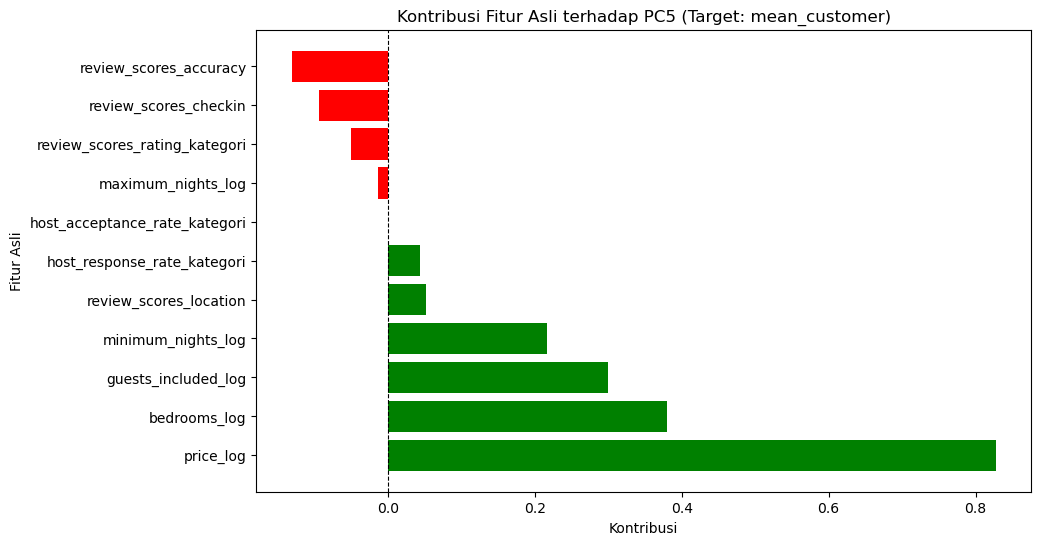

In [671]:
# Visualisasi kontribusi fitur di PC5
plt.figure(figsize=(10, 6))
plt.barh(pc5_features['Feature'], pc5_features['Contribution'], color=pc5_features['Contribution'].apply(lambda x: 'green' if x > 0 else 'red'))
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Kontribusi Fitur Asli terhadap PC5 (Target: mean_customer)')
plt.xlabel('Kontribusi')
plt.ylabel('Fitur Asli')
plt.show()

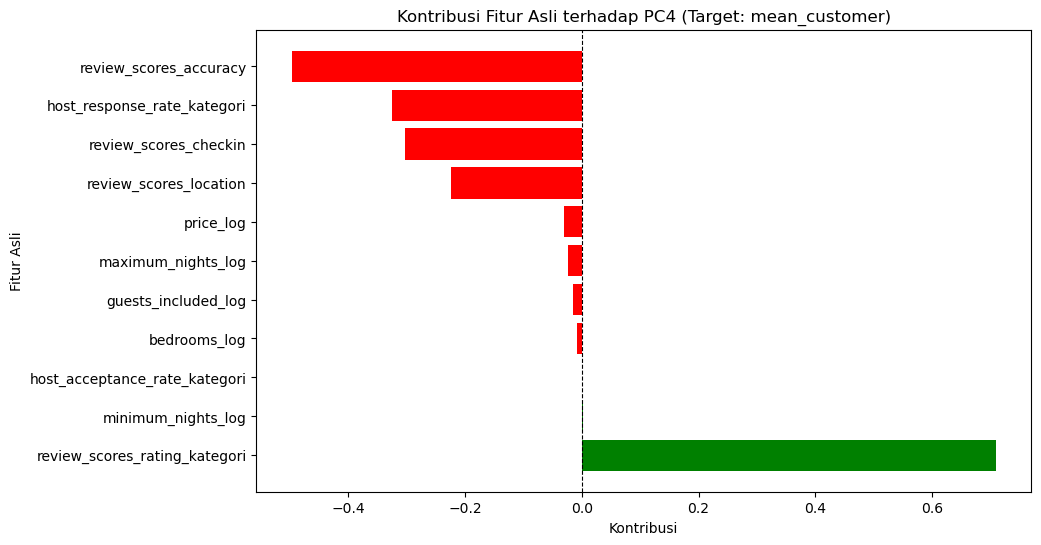

In [750]:
# Visualisasi kontribusi fitur di PC4
plt.figure(figsize=(10, 6))
plt.barh(pc4_features['Feature'], pc4_features['Contribution'], color=pc4_features['Contribution'].apply(lambda x: 'green' if x > 0 else 'red'))
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Kontribusi Fitur Asli terhadap PC4 (Target: mean_customer)')
plt.xlabel('Kontribusi')
plt.ylabel('Fitur Asli')
plt.show()

In [673]:
corr_price_customer = numeric_df[['price_log', 'mean_customer']].corr()
print(corr_price_customer)

               price_log  mean_customer
price_log       1.000000      -0.000483
mean_customer  -0.000483       1.000000


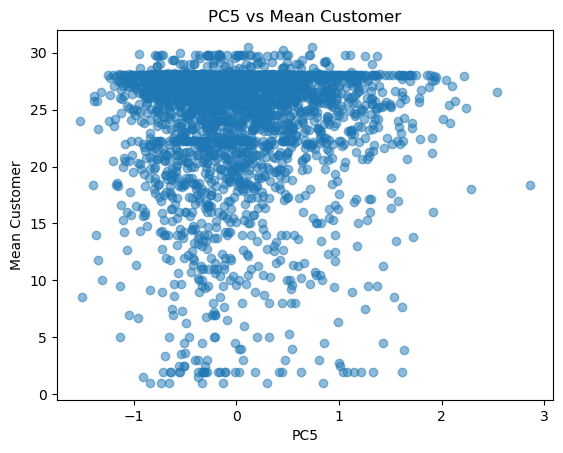

In [675]:
plt.scatter(X_train_pca_df['PC5'], y_train_pca_customer, alpha=0.5)
plt.xlabel('PC5')
plt.ylabel('Mean Customer')
plt.title('PC5 vs Mean Customer')
plt.show()

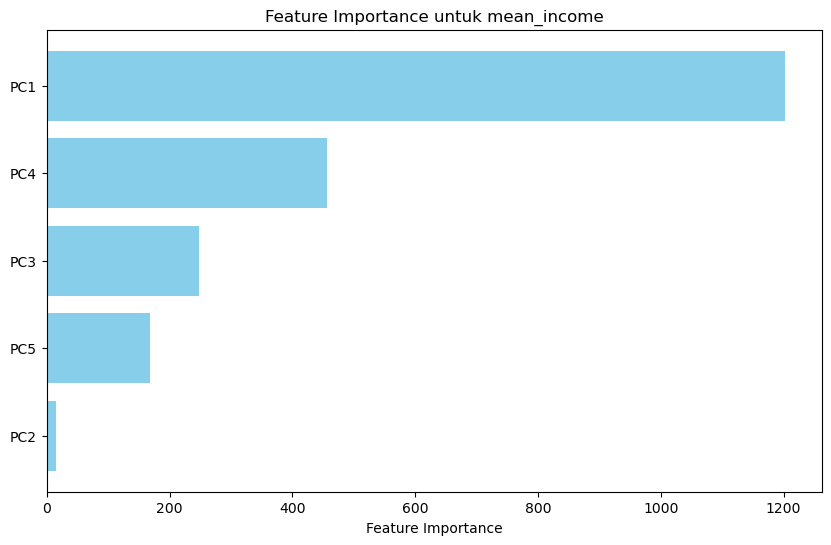

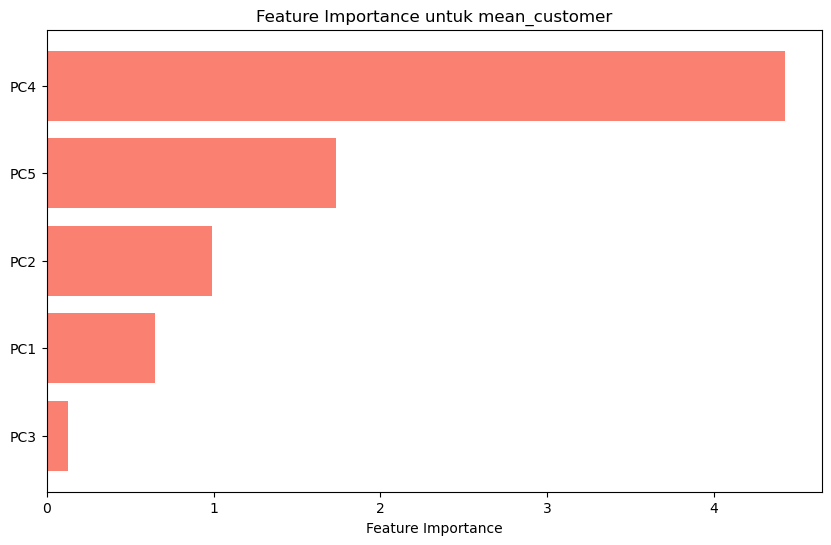

In [631]:
# Terapkan PCA pada data
pca = PCA(n_components=5)  # Misalnya, ambil 10 komponen utama
X_train_pca = pca.fit_transform(X_train)  # Hasil transformasi PCA

# Menambahkan nama kolom untuk X_train_pca
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

# Model SVR untuk mean_income
if best_svr_income.kernel == 'linear':
    coef_income = best_svr_income.coef_.flatten()
    feature_importance_income = pd.DataFrame({
        'Feature': X_train_pca_df.columns,
        'Importance': np.abs(coef_income)
    }).sort_values(by='Importance', ascending=True)

    # Visualisasikan dengan bar horizontal
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_income['Feature'], feature_importance_income['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance untuk mean_income')
    plt.show()

# Model SVR untuk mean_customer
if best_svr_customer.kernel == 'linear':
    coef_customer = best_svr_customer.coef_.flatten()
    feature_importance_customer = pd.DataFrame({
        'Feature': X_train_pca_df.columns,
        'Importance': np.abs(coef_customer)
    }).sort_values(by='Importance', ascending=True)

    # Visualisasikan dengan bar horizontal
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_customer['Feature'], feature_importance_customer['Importance'], color='salmon')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance untuk mean_customer')
    plt.show()

In [633]:
# Komponen PCA yang paling mempengaruhi target
most_important_pc_income = feature_importance_income.iloc[-1]  # Baris terakhir karena diurut ascending
print("PCA yang paling mempengaruhi mean_income:")
print(most_important_pc_income)

PCA yang paling mempengaruhi mean_income:
Feature               PC1
Importance    1202.202333
Name: 0, dtype: object


In [635]:
# Ambil loading matrix
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
    index=X_train.columns
)

# Fitur asli yang paling berkontribusi pada PC yang penting
pc_key = most_important_pc_income['Feature']  # Nama PC yang penting (misalnya, "PC1")
loadings_for_key_pc = loadings[pc_key].sort_values(key=abs, ascending=False)

print(f"Fitur asli yang paling berkontribusi pada {pc_key}:")
print(loadings_for_key_pc)

Fitur asli yang paling berkontribusi pada PC1:
maximum_nights_log              -0.999334
review_scores_checkin            0.016360
review_scores_accuracy           0.016331
price_log                       -0.016114
review_scores_rating_kategori   -0.014259
minimum_nights_log               0.014203
bedrooms_log                    -0.007891
guests_included_log              0.007046
host_response_rate_kategori      0.004149
review_scores_location          -0.001927
host_acceptance_rate_kategori   -0.000121
Name: PC1, dtype: float64


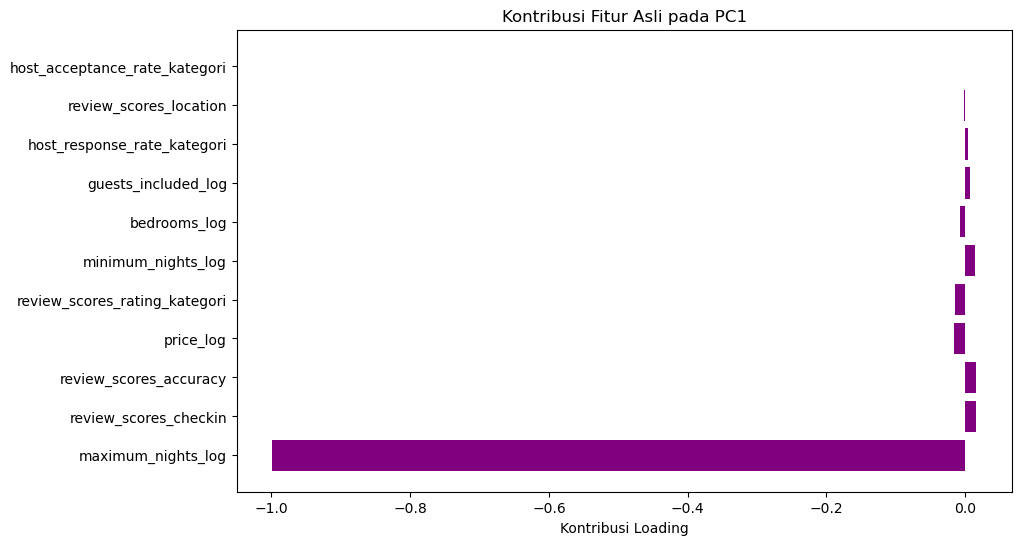

In [637]:
plt.figure(figsize=(10, 6))
plt.barh(loadings_for_key_pc.index, loadings_for_key_pc.values, color='purple')
plt.xlabel('Kontribusi Loading')
plt.title(f'Kontribusi Fitur Asli pada {pc_key}')
plt.show()

In [639]:
most_important_pc_income = feature_importance_customer.iloc[-1]  # Baris terakhir karena diurut ascending
print("PCA yang paling mempengaruhi mean_income:")
print(most_important_pc_income)

PCA yang paling mempengaruhi mean_income:
Feature            PC4
Importance    4.427266
Name: 3, dtype: object


In [641]:
# Ambil loading matrix
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
    index=X_train.columns
)

# Fitur asli yang paling berkontribusi pada PC yang penting
pc_key = most_important_pc_income['Feature']  # Nama PC yang penting (misalnya, "PC1")
loadings_for_key_pc = loadings[pc_key].sort_values(key=abs, ascending=False)

print(f"Fitur asli yang paling berkontribusi pada {pc_key}:")
print(loadings_for_key_pc)

Fitur asli yang paling berkontribusi pada PC4:
review_scores_rating_kategori    0.709543
review_scores_accuracy          -0.497072
host_response_rate_kategori     -0.325062
review_scores_checkin           -0.302710
review_scores_location          -0.224494
price_log                       -0.030638
maximum_nights_log              -0.023642
guests_included_log             -0.014454
bedrooms_log                    -0.007885
minimum_nights_log               0.001630
host_acceptance_rate_kategori    0.000183
Name: PC4, dtype: float64


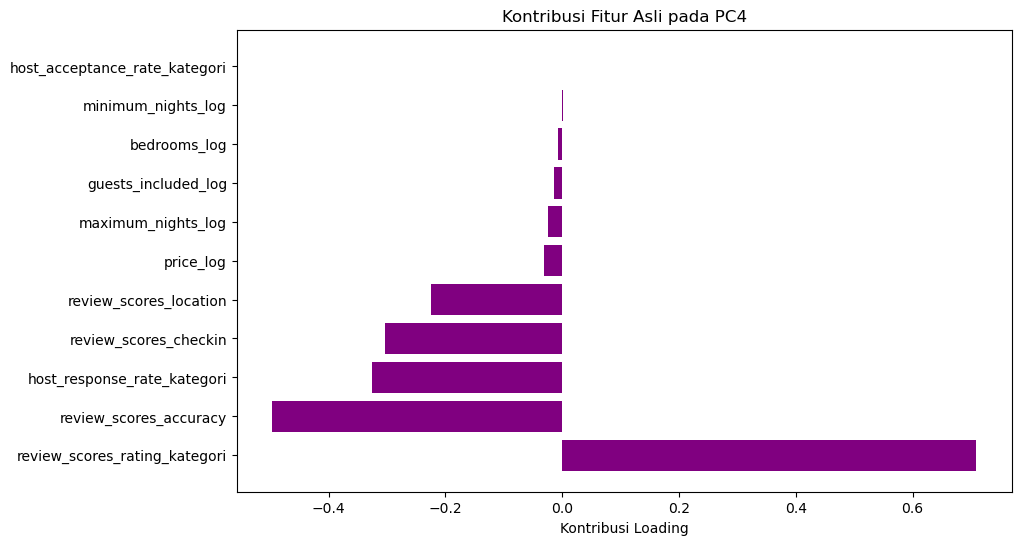

In [643]:
plt.figure(figsize=(10, 6))
plt.barh(loadings_for_key_pc.index, loadings_for_key_pc.values, color='purple')
plt.xlabel('Kontribusi Loading')
plt.title(f'Kontribusi Fitur Asli pada {pc_key}')
plt.show()

In [645]:
# Ambil loading matrix
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose agar fitur menjadi baris
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],  # Nama PC
    index=X_train.columns  # Nama fitur asli
)

# Ambil kontribusi fitur asli untuk PCA1 dan PCA4
loadings_pca1 = loadings['PC1']
loadings_pca4 = loadings['PC4']

In [647]:
# Ambil nilai feature importance dari PCA1
importance_pca1_income = feature_importance_income.query('Feature == "PC1"')['Importance'].values[0]

# Hitung kontribusi fitur asli terhadap PCA1
feature_importance_income_original = loadings_pca1 * importance_pca1_income

# Buat DataFrame untuk hasil
feature_importance_income_df = pd.DataFrame({
    'Feature': loadings_pca1.index,
    'Importance': np.abs(feature_importance_income_original)
}).sort_values(by='Importance', ascending=False)

print(feature_importance_income_df)

                                                     Feature   Importance
maximum_nights_log                        maximum_nights_log  1201.401450
review_scores_checkin                  review_scores_checkin    19.667451
review_scores_accuracy                review_scores_accuracy    19.633044
price_log                                          price_log    19.372502
review_scores_rating_kategori  review_scores_rating_kategori    17.142575
minimum_nights_log                        minimum_nights_log    17.075278
bedrooms_log                                    bedrooms_log     9.486403
guests_included_log                      guests_included_log     8.471059
host_response_rate_kategori      host_response_rate_kategori     4.987636
review_scores_location                review_scores_location     2.316599
host_acceptance_rate_kategori  host_acceptance_rate_kategori     0.145770


In [649]:
# Ambil nilai feature importance dari PCA4
importance_pca4_customer = feature_importance_customer.query('Feature == "PC4"')['Importance'].values[0]

# Hitung kontribusi fitur asli terhadap PCA4
feature_importance_customer_original = loadings_pca4 * importance_pca4_customer

# Buat DataFrame untuk hasil
feature_importance_customer_df = pd.DataFrame({
    'Feature': loadings_pca4.index,
    'Importance': np.abs(feature_importance_customer_original)
}).sort_values(by='Importance', ascending=False)

print(feature_importance_customer_df)

                                                     Feature  Importance
review_scores_rating_kategori  review_scores_rating_kategori    3.141336
review_scores_accuracy                review_scores_accuracy    2.200670
host_response_rate_kategori      host_response_rate_kategori    1.439136
review_scores_checkin                  review_scores_checkin    1.340179
review_scores_location                review_scores_location    0.993896
price_log                                          price_log    0.135641
maximum_nights_log                        maximum_nights_log    0.104669
guests_included_log                      guests_included_log    0.063993
bedrooms_log                                    bedrooms_log    0.034908
minimum_nights_log                        minimum_nights_log    0.007217
host_acceptance_rate_kategori  host_acceptance_rate_kategori    0.000810


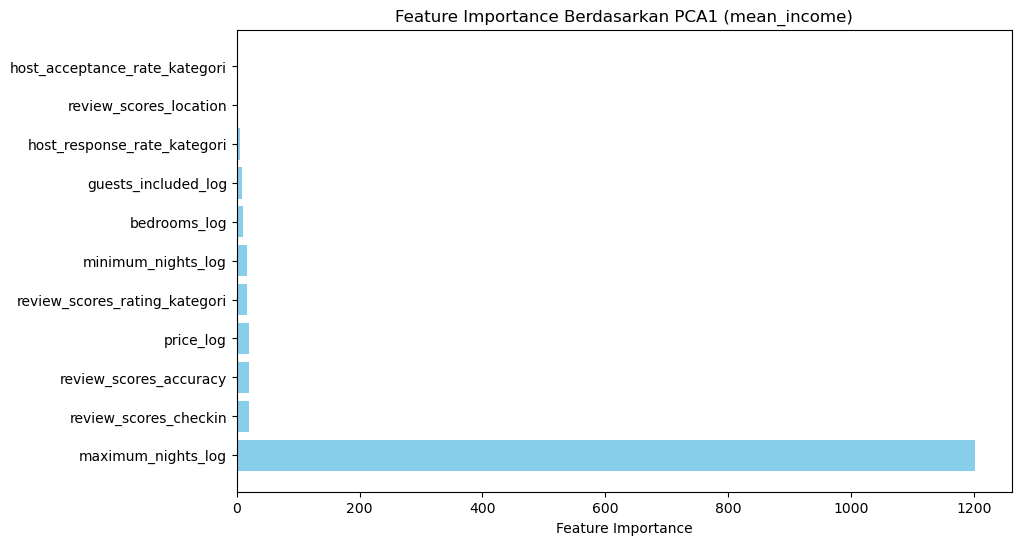

In [651]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_income_df['Feature'], feature_importance_income_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Berdasarkan PCA1 (mean_income)')
plt.show()

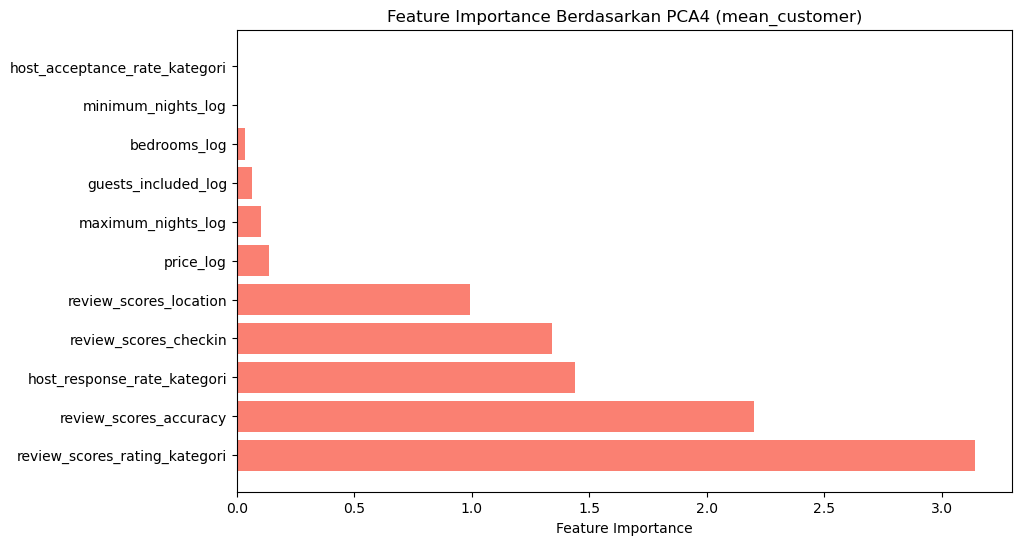

In [653]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_customer_df['Feature'], feature_importance_customer_df['Importance'], color='salmon')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Berdasarkan PCA4 (mean_customer)')
plt.show()